In [35]:
import numpy as np 
import pandas as pd 
import openpyxl
import matplotlib.pyplot as plt 

In [ ]:
data_all = pd.read_excel('Dati finali corretti.xlsx', header=1)
name = 'STOGIT'
data = data_all.loc[data_all['Response.1']== name]

In [ ]:
master_mapping = {
    # Age/Experience scales
    '< 30 anni': 1, '30 – 50 anni': 2, '> 50 anni': 3,
    '< 3 anni': 1, '3 – 10 anni': 2, '> 10 anni': 3,
    
    # Agreement scales
    '6 = Totalmente in accordo': 6, 
    '1 = Totalmente in disaccordo': 1, 
    'Non lo so': 0
}
inv_map = {v: k for k, v in master_mapping.items()}

# Applica il mapping e risolvi il FutureWarning di Pandas
data = data.replace(master_mapping).infer_objects(copy=False)
# Apply to the entire dataframe regardless of column names
data = data.replace(master_mapping)


/var/folders/qy/_70my3js6f54hxt23_54rnp40000gn/T/ipykernel_43955/1670354006.py:14: Pandas4Warning: The copy keyword is deprecated and will be removed in a future version. Copy-on-Write is active in pandas since 3.0 which utilizes a lazy copy mechanism that defers copies until necessary. Use .copy() to make an eager copy if necessary.
  data = data.replace(master_mapping).infer_objects(copy=False)


Campione

In [36]:
print(data.iloc[:,22])

2366    5
2367    5
2368    5
2369    5
2370    6
       ..
2426    6
2427    6
2428    5
2429    5
2430    6
Name: Nella mia organizzazione viene promossa la condivisione di problemi, osservazioni, esperienze e buone pratiche sui temi Sicurezza e Ambiente, Length: 65, dtype: int64


In [24]:
def get_summary_dataset(subset):
    rows = []
    for col in subset.columns:
        perc = subset[col].value_counts(normalize=True) * 100
        df_row = pd.DataFrame(perc).T
        df_row.index = [col]
        rows.append(df_row)
    
    dataset = pd.concat(rows).fillna(0)
    dataset = dataset.sort_index(axis=1, ascending=True)
    
    # Calcola medie escludendo gli zeri (sostituendoli con NaN)
    medie = subset.apply(pd.to_numeric, errors='coerce').replace(0, np.nan).mean()
    
    dataset['Media'] = medie.round(2)
    dataset['Media_analisi'] = dataset['Media'].mean().round(2)
    
    return dataset


Comunicazione

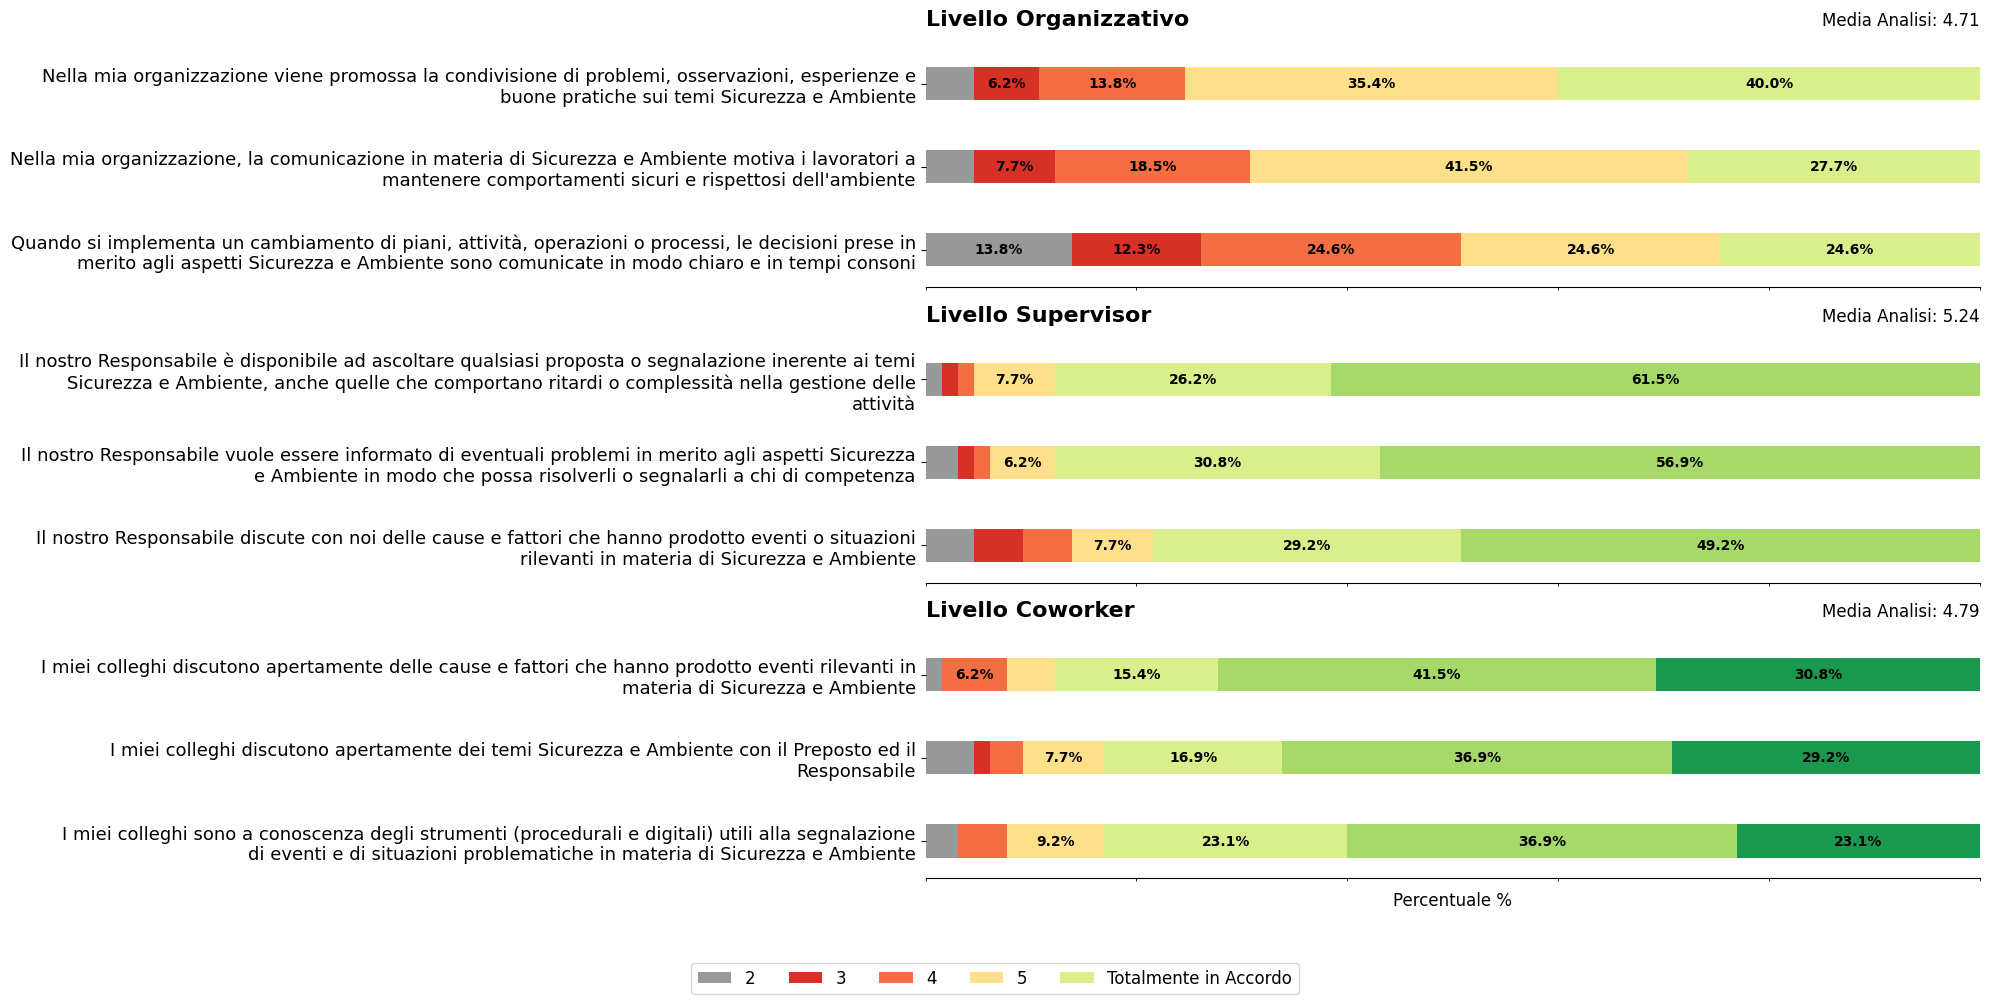

2          3  \
Nella mia organizzazione viene promossa la cond...   4.615385   6.153846   
Nella mia organizzazione, la comunicazione in m...   4.615385   7.692308   
Quando si implementa un cambiamento di piani, a...  13.846154  12.307692   
Il nostro Responsabile è disponibile ad ascolta...   1.538462   1.538462   
Il nostro Responsabile vuole essere informato d...   1.538462   1.538462   
Il nostro Responsabile discute con noi delle ca...   4.615385   4.615385   
I miei colleghi discutono apertamente delle cau...   6.153846   4.615385   
I miei colleghi discutono apertamente dei temi ...   3.076923   7.692308   
I miei colleghi sono a conoscenza degli strumen...   4.615385   9.230769   

                                                            4          5  \
Nella mia organizzazione viene promossa la cond...  13.846154  35.384615   
Nella mia organizzazione, la comunicazione in m...  18.461538  41.538462   
Quando si implementa un cambiamento di piani, a...  24.615385  24.615385   
Il nostro Responsabile è disponibile ad ascolta...   7.692308  26.153846   
Il nostro Responsabile vuole essere informato d...   6.153846  30.769231   
Il nostro Responsabile discute con noi delle ca...   7.692308  29.230769   
I miei colleghi discutono apertamente delle cau...  15.384615  41.538462   
I miei colleghi discutono apertamente dei temi ...  16.923077  36.923077   
I miei colleghi sono a conoscenza degli strumen...  23.076923  36.923077   

                                                            6  Media  \
Nella mia organizzazione viene promossa la cond...  40.000000   5.00   
Nella mia organizzazione, la comunicazione in m...  27.692308   4.80   
Quando si implementa un cambiamento di piani, a...  24.615385   4.34   
Il nostro Responsabile è disponibile ad ascolta...  61.538462   5.40   
Il nostro Responsabile vuole essere informato d...  56.923077   5.31   
Il nostro Responsabile discute con noi delle ca...  49.230769   5.00   
I miei colleghi discutono apertamente delle cau...  30.769231   4.88   
I miei colleghi discutono apertamente dei temi ...  29.230769   4.81   
I miei colleghi sono a conoscenza degli strumen...  23.076923   4.67   

                                                    Media_analisi         1  \
Nella mia organizzazione viene promossa la cond...           4.71       NaN   
Nella mia organizzazione, la comunicazione in m...           4.71       NaN   
Quando si implementa un cambiamento di piani, a...           4.71       NaN   
Il nostro Responsabile è disponibile ad ascolta...           5.24  1.538462   
Il nostro Responsabile vuole essere informato d...           5.24  3.076923   
Il nostro Responsabile discute con noi delle ca...           5.24  4.615385   
I miei colleghi discutono apertamente delle cau...           4.79  0.000000   
I miei colleghi discutono apertamente dei temi ...           4.79  1.538462   
I miei colleghi sono a conoscenza degli strumen...           4.79  0.000000   

                                                           0  
Nella mia organizzazione viene promossa la cond...       NaN  
Nella mia organizzazione, la comunicazione in m...       NaN  
Quando si implementa un cambiamento di piani, a...       NaN  
Il nostro Responsabile è disponibile ad ascolta...       NaN  
Il nostro Responsabile vuole essere informato d...       NaN  
Il nostro Responsabile discute con noi delle ca...       NaN  
I miei colleghi discutono apertamente delle cau...  1.538462  
I miei colleghi discutono apertamente dei temi ...  4.615385  
I miei colleghi sono a conoscenza degli strumen...  3.076923

In [25]:
df_org = get_summary_dataset(data.iloc[:, 22:25]).sort_values(by=6, ascending=False)
df_sup = get_summary_dataset(data.iloc[:, 25:28]).sort_values(by=6, ascending=False)
df_cow = get_summary_dataset(data.iloc[:, 28:31]).sort_values(by=6, ascending=False)

# 2. Definiamo i nomi per la legenda (da 0 a 6)
mappa_nomi = {
    0: 'Non lo so', 
    1: 'Totalmente in Disaccordo', 
    2: '2', 
    3: '3', 
    4: '4', 
    5: '5', 
    6: 'Totalmente in Accordo'
}
colori = ['#999999', '#d73027', '#f46d43', '#fee08b', '#d9ef8b', '#a6d96a', '#1a9850']

piani_grafico = [
    (df_org, "Livello Organizzativo"),
    (df_sup, "Livello Supervisor"),
    (df_cow, "Livello Coworker")
]

import textwrap

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10), sharex=True)

for i, (df, titolo) in enumerate(piani_grafico):
    ax = axes[i]
    
    df_plot = df.iloc[:, :-2].copy()
    

    labels_wrapped = [textwrap.fill(label, width=100) for label in df_plot.index]
    df_plot.index = labels_wrapped

    plot = df_plot.plot(kind='barh', stacked=True, color=colori, ax=ax, legend=False, width=0.4)
    
    for container in ax.containers:
        labels = [f'{v.get_width():.1f}%' if v.get_width() > 5 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=10, fontweight='bold')
    
    ax.set_title(titolo, fontsize=16, fontweight='bold', loc='left', pad=15)
    ax.text(85,-0.7, f'Media Analisi: {df["Media"].mean():.2f}', fontsize= 12)
    
    ax.tick_params(axis='y', labelsize=13) 
    ax.tick_params(axis='x', labelsize=11)
    
    ax.invert_yaxis() 
    ax.set_xlim(0, 100)
    ax.set_xlabel("Percentuale %", fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.set_xticks([])

etichette_legenda = [mappa_nomi[int(c)] for c in df_org.columns[:-2]]
fig.legend(
    labels=etichette_legenda,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.02),
    ncol=7,
    frameon=True,
    fontsize=12
)

# Ottimizzazione spazi per evitare che i testi lunghi vengano tagliati
plt.tight_layout(rect=[0, 0.05, 1, 0.98]) 
plt.show()

# Verifica finale del dataset completo
df_completo = pd.concat([df_org, df_sup, df_cow])
df_completo

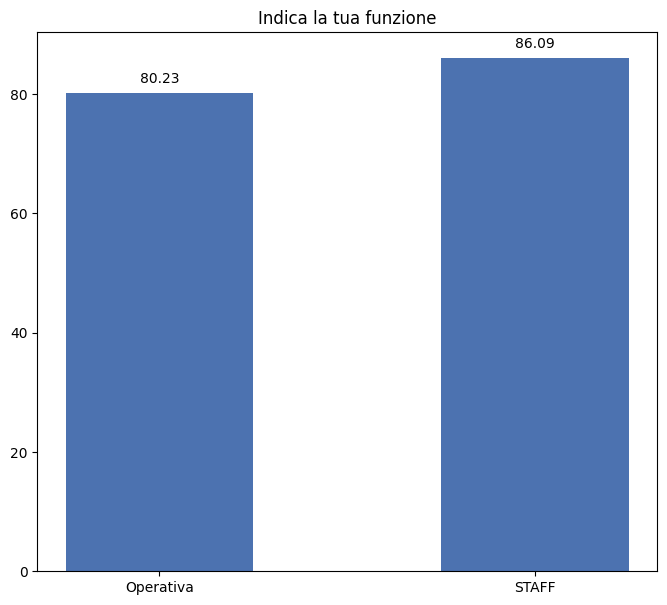

In [26]:
def get_stratified_means_full_benchmarks(data, subset_cols, stratifier_col):
    temp_df = data[subset_cols].apply(pd.to_numeric, errors='coerce').replace(0, np.nan)
    temp_df[stratifier_col] = data[stratifier_col]
    report_medie = temp_df.groupby(stratifier_col).mean().T *100/6
    return report_medie.round(2)

# Definisci le sezioni di colonne
sezioni = [(22, 25), (25, 28), (28, 31)]

# Definisci le stratificazioni
stratificazioni = {
    'Funzione': {
        'col': 'Response.12',
        'ticks': ['Operativa', 'STAFF'],
        'title': 'Indica la tua funzione'
    },
}

# Calcola tutti i report
risultati = {}
for nome, config in stratificazioni.items():
    reports = []
    for start, end in sezioni:
        report = get_stratified_means_full_benchmarks(
            data, 
            data.iloc[:, start:end].columns,
            config['col']
        )
        reports.append(report)
    risultati[nome] = pd.concat(reports)

# Crea il grafico
fig, ax = plt.subplots(figsize=(8, 7))
config = stratificazioni['Funzione']
ax.bar(config['ticks'], risultati['Funzione'].iloc[:, :2].mean(), width=0.5, color='#4c72b0')
ax.set_title(config['title'])
ax.bar_label(
    ax.containers[0], 
    labels=[f'{v.get_height():.2f}' for v in ax.containers[0]], 
    color='black', 
    fontsize=10,
    padding=5
)
plt.show()

Proviamoce

Generazione di 8 set di grafici...

=== SET 1: Sezioni [(22, 25), (25, 28), (28, 31)] ===
Generando grafico stacked...


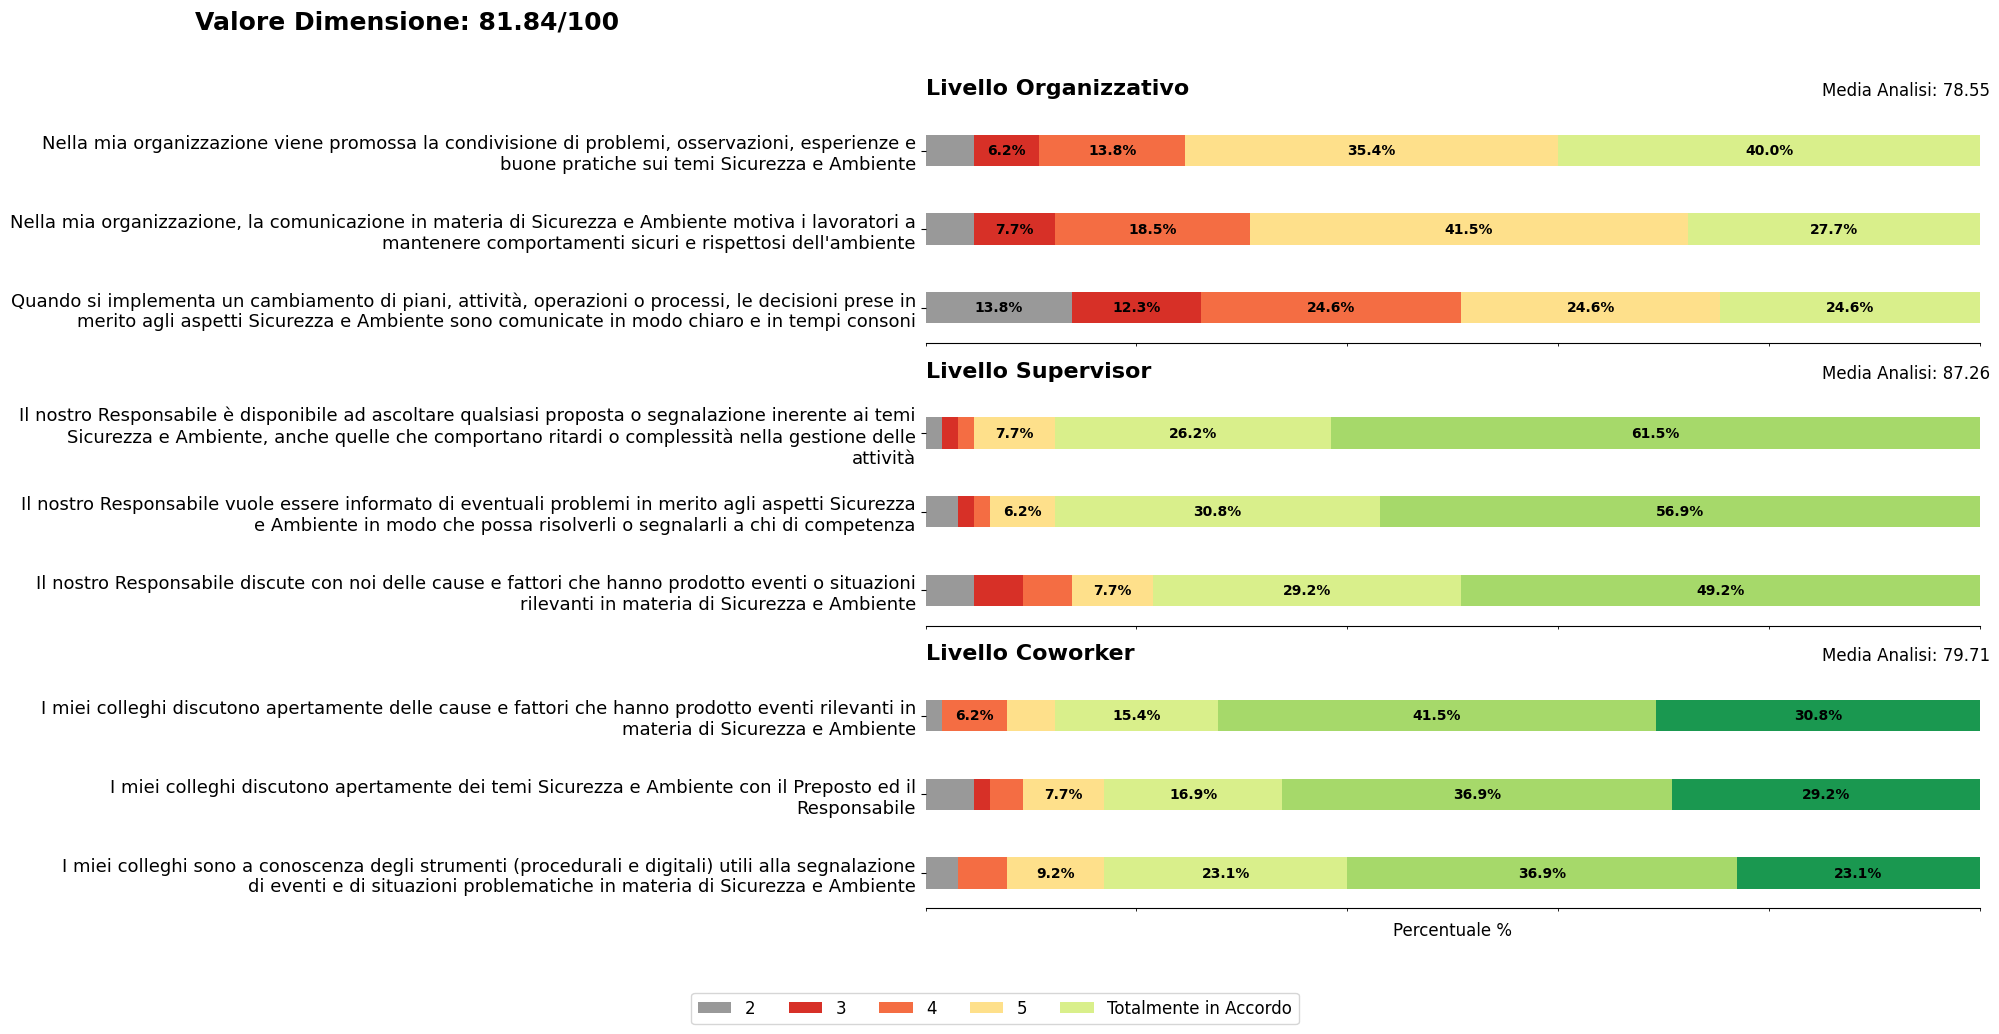

Generando grafici stratificati (età/anzianità)...


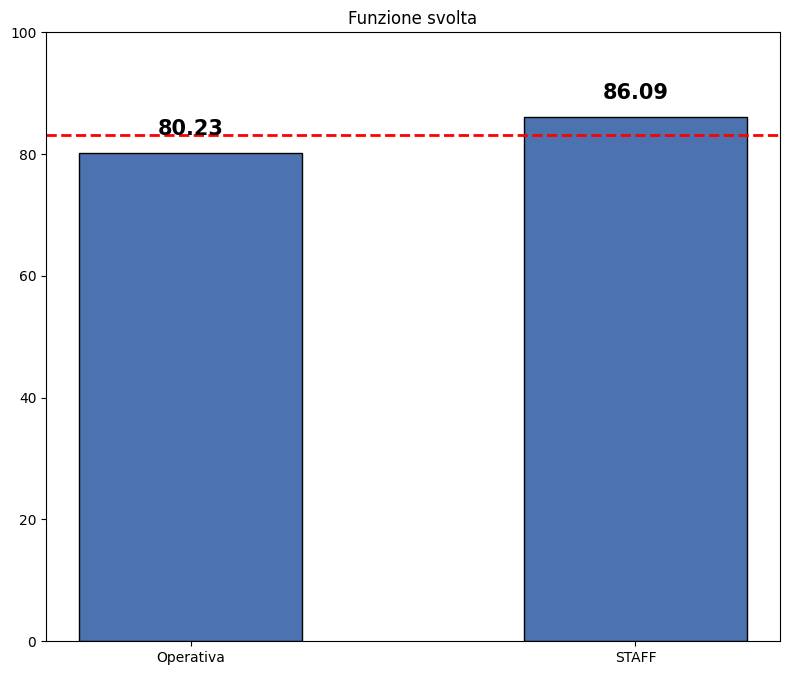

Set 1 completato!

=== SET 2: Sezioni [(31, 34), (34, 37), (37, 40)] ===
Generando grafico stacked...


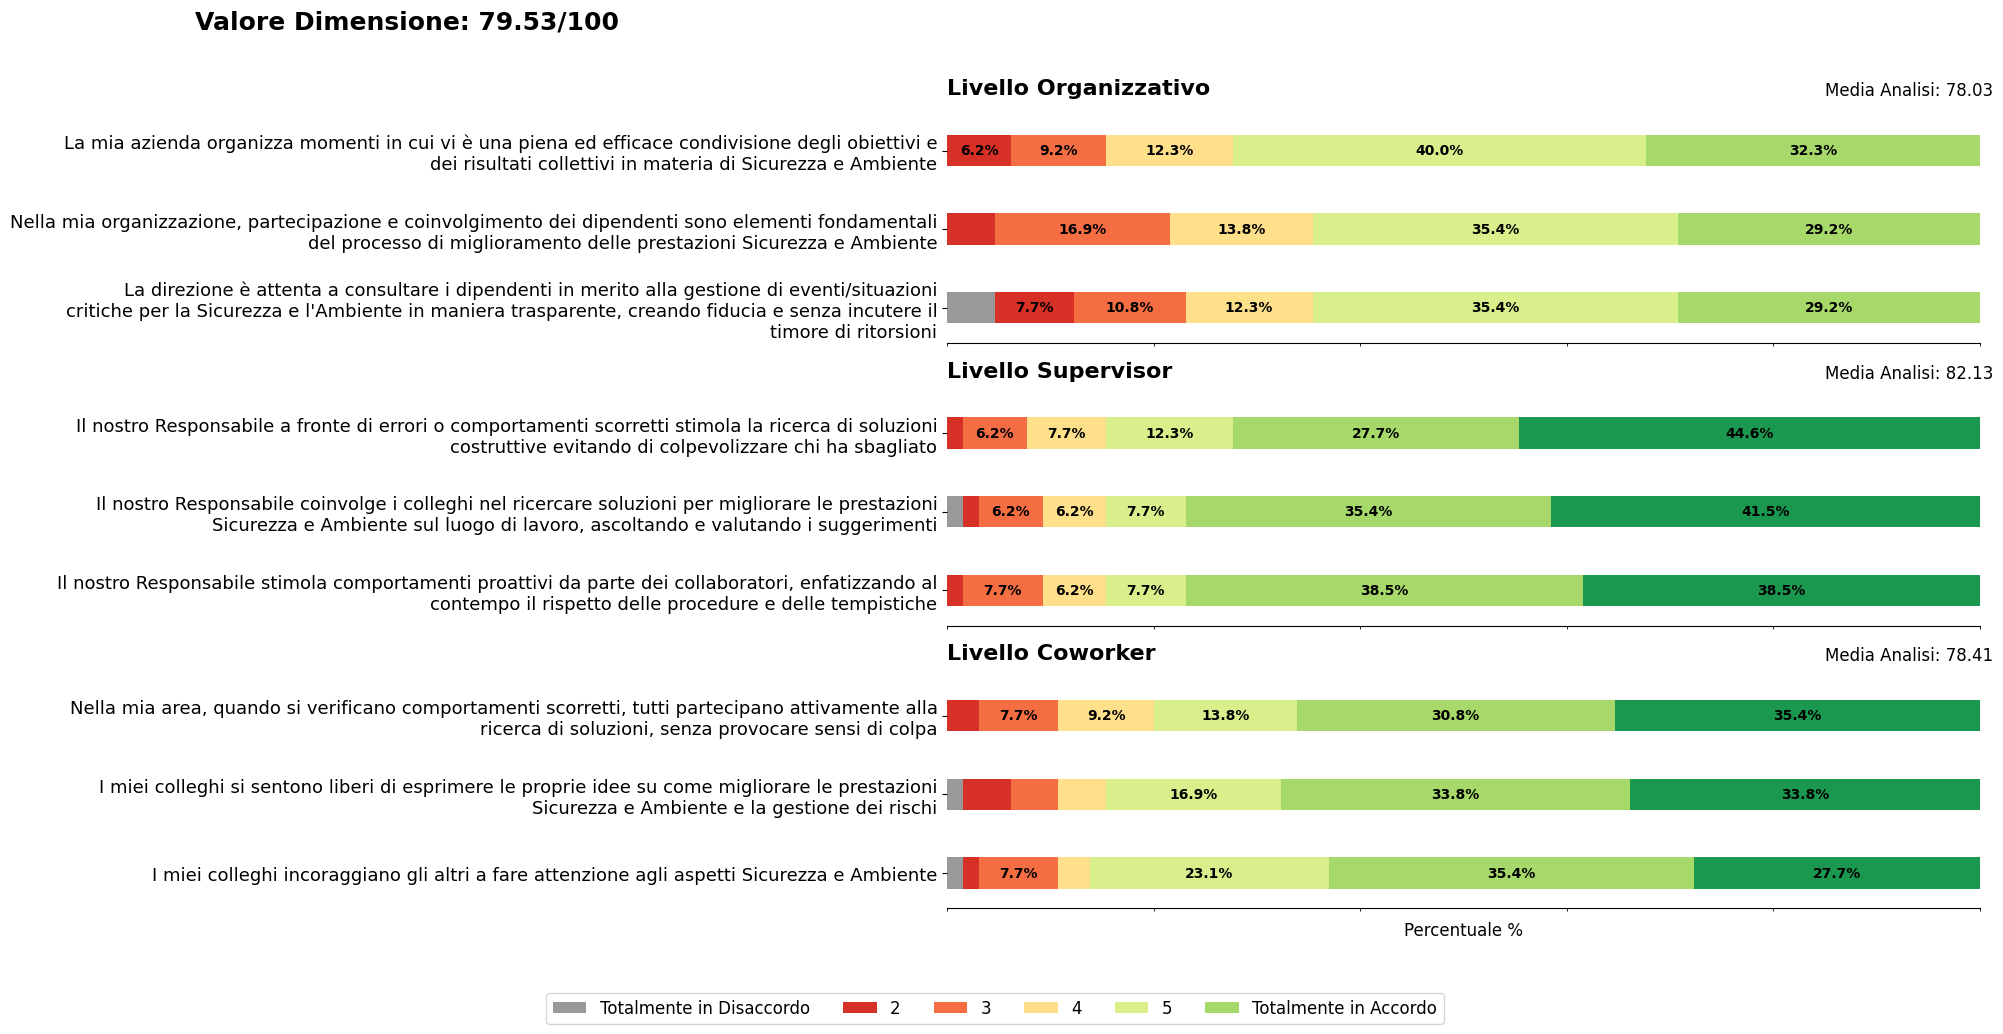

Generando grafici stratificati (età/anzianità)...


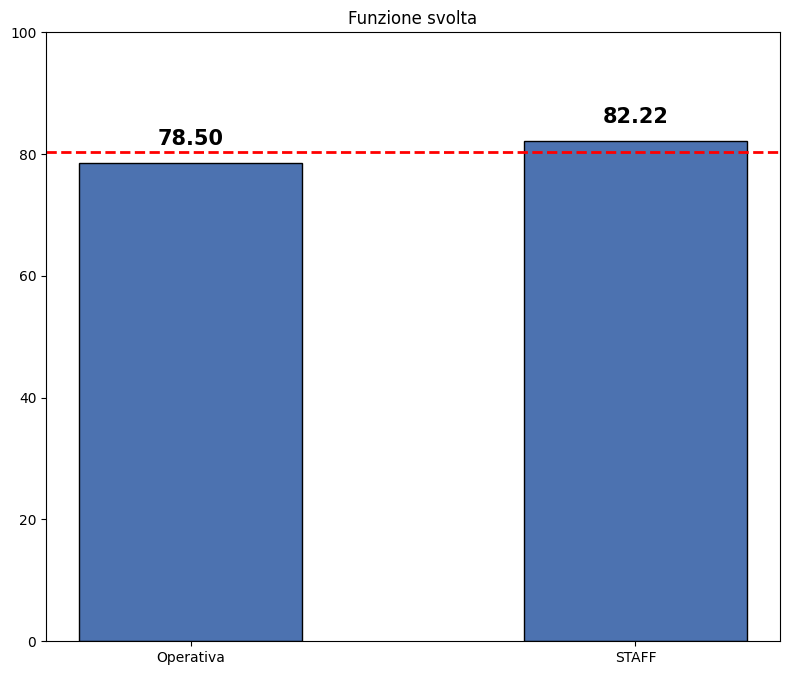

Set 2 completato!

=== SET 3: Sezioni [(41, 44), (44, 47), (47, 50)] ===
Generando grafico stacked...


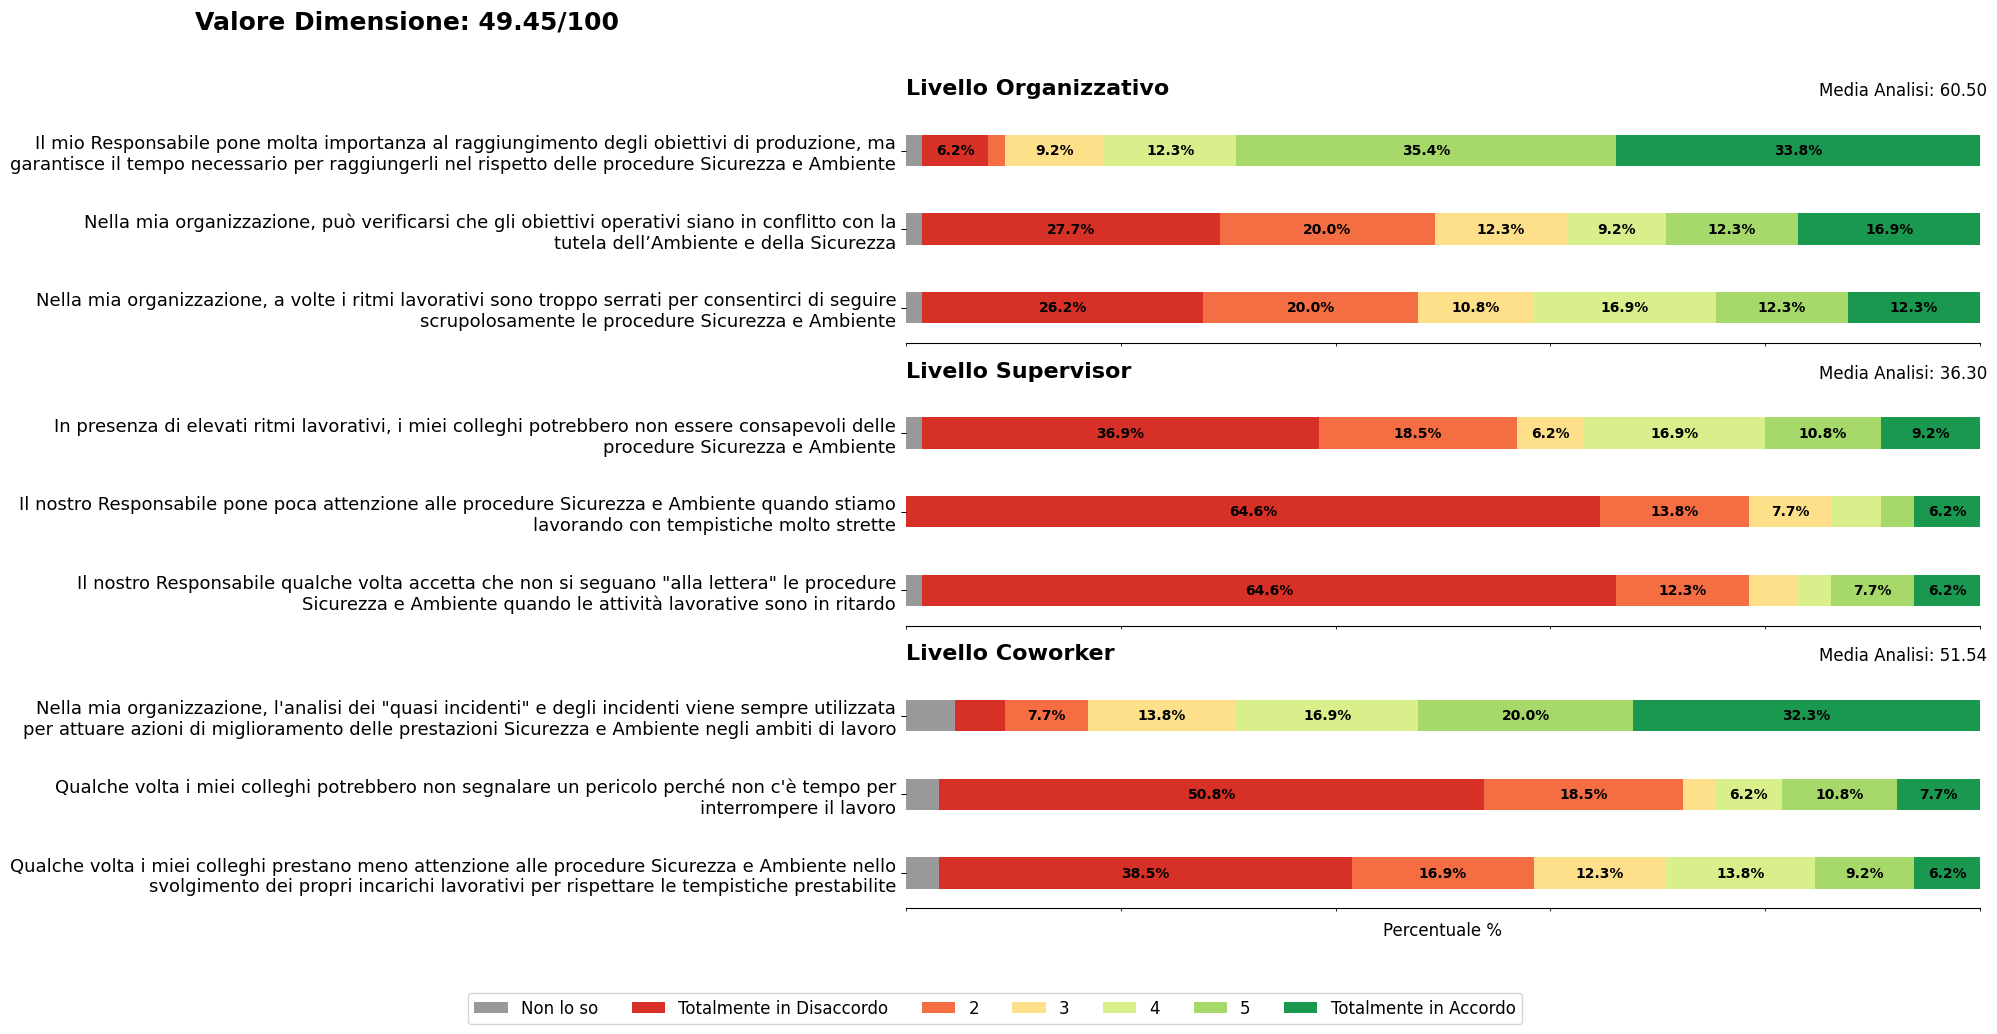

Generando grafici stratificati (età/anzianità)...


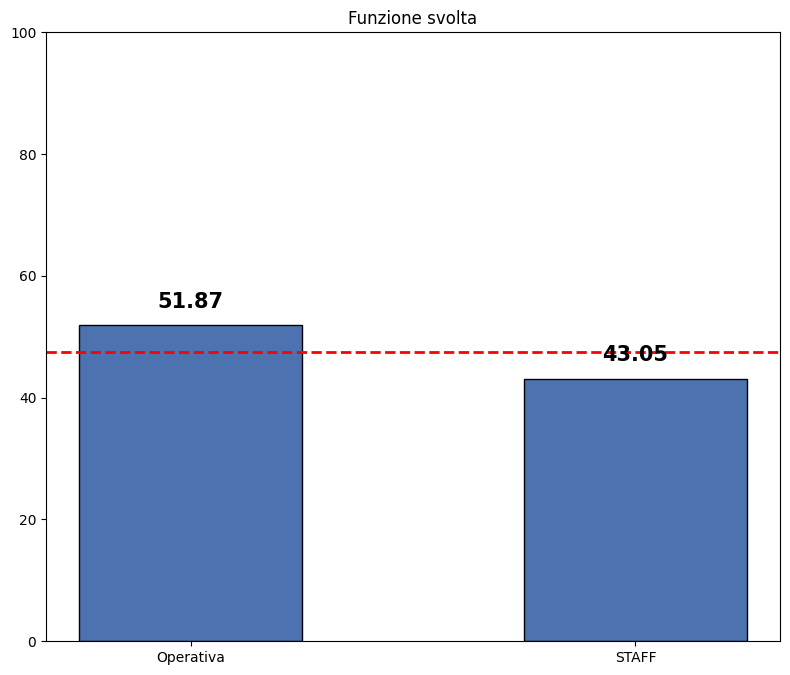

Set 3 completato!

=== SET 4: Sezioni [(50, 53), (53, 56), (56, 59)] ===
Generando grafico stacked...


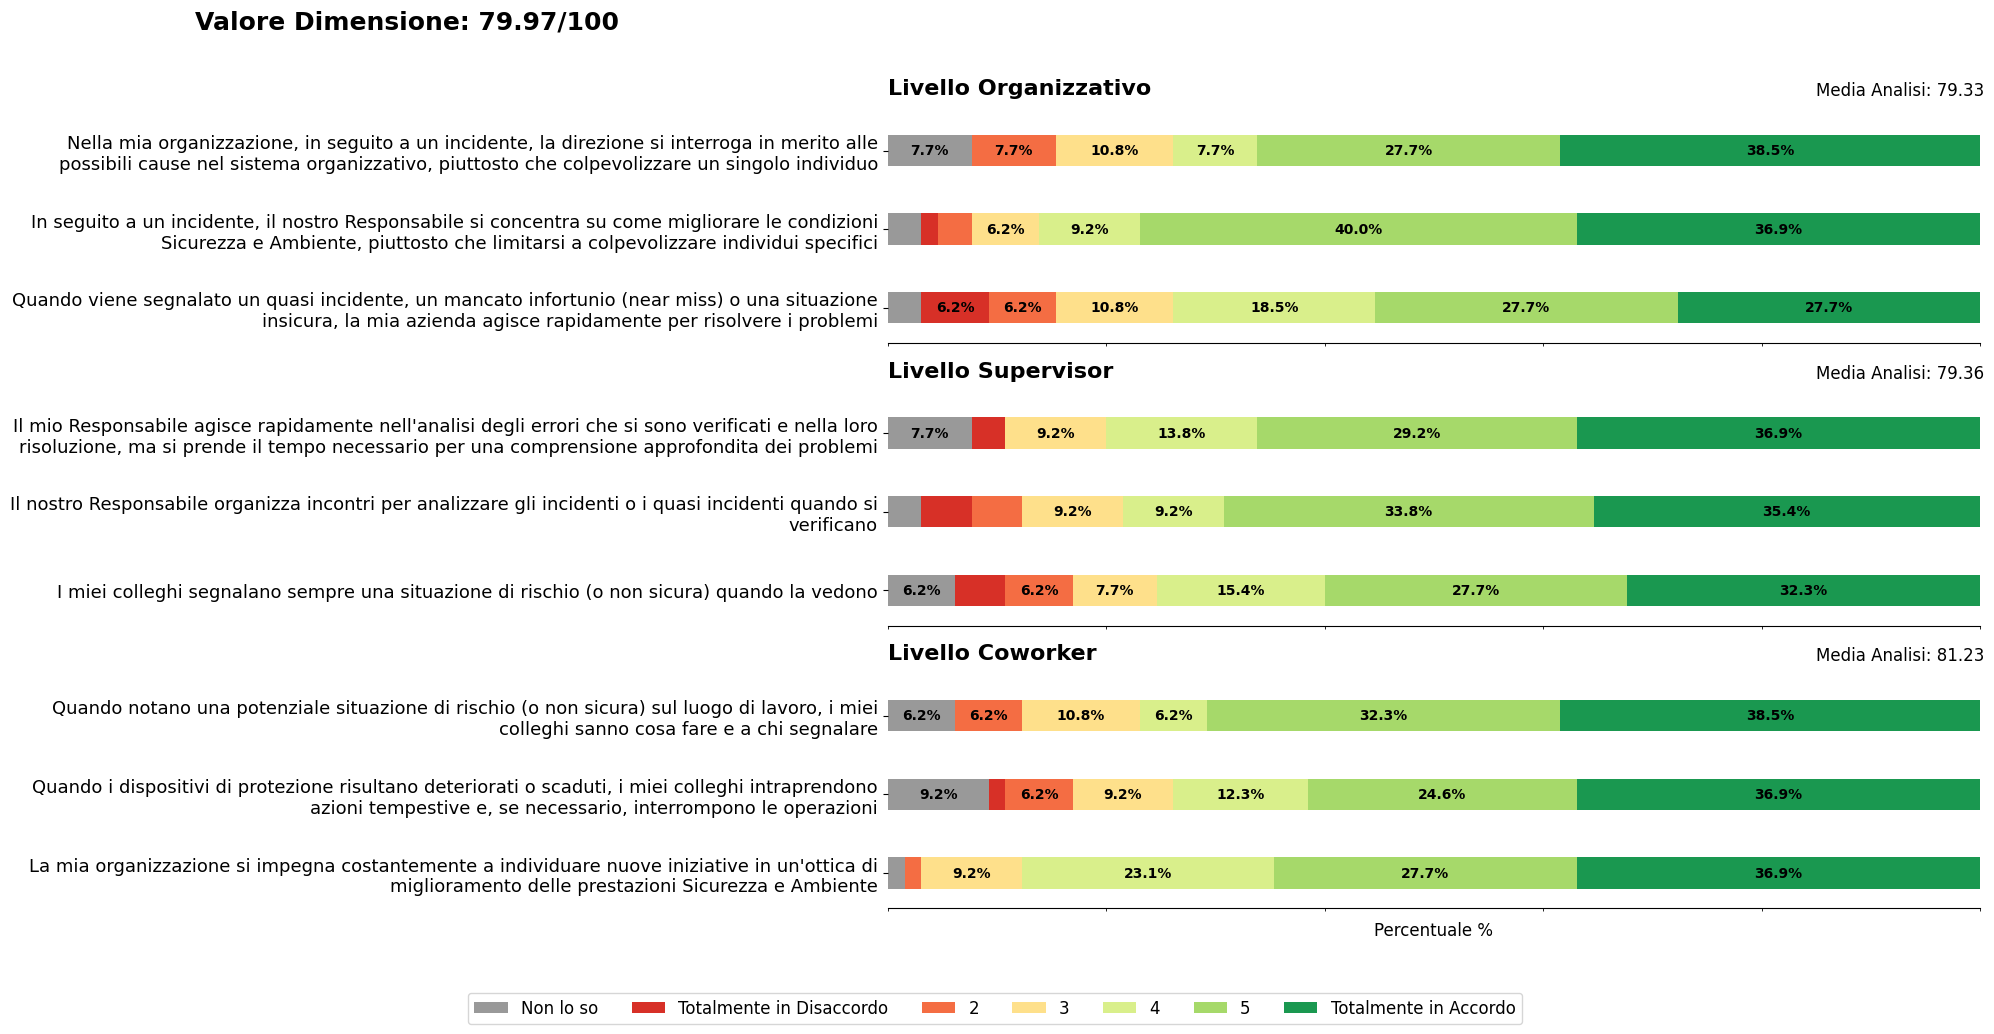

Generando grafici stratificati (età/anzianità)...


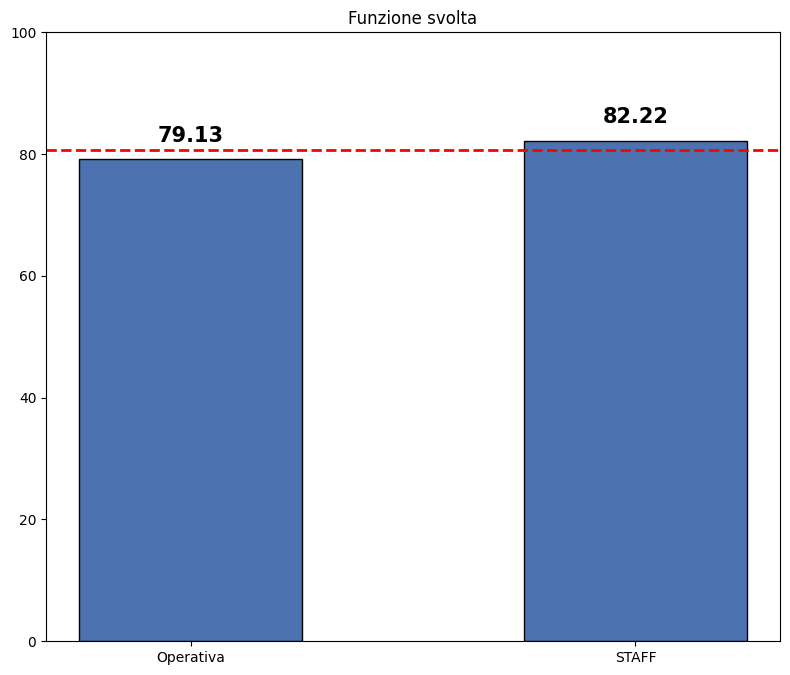

Set 4 completato!

=== SET 5: Sezioni [(59, 62), (62, 65), (65, 68)] ===
Generando grafico stacked...


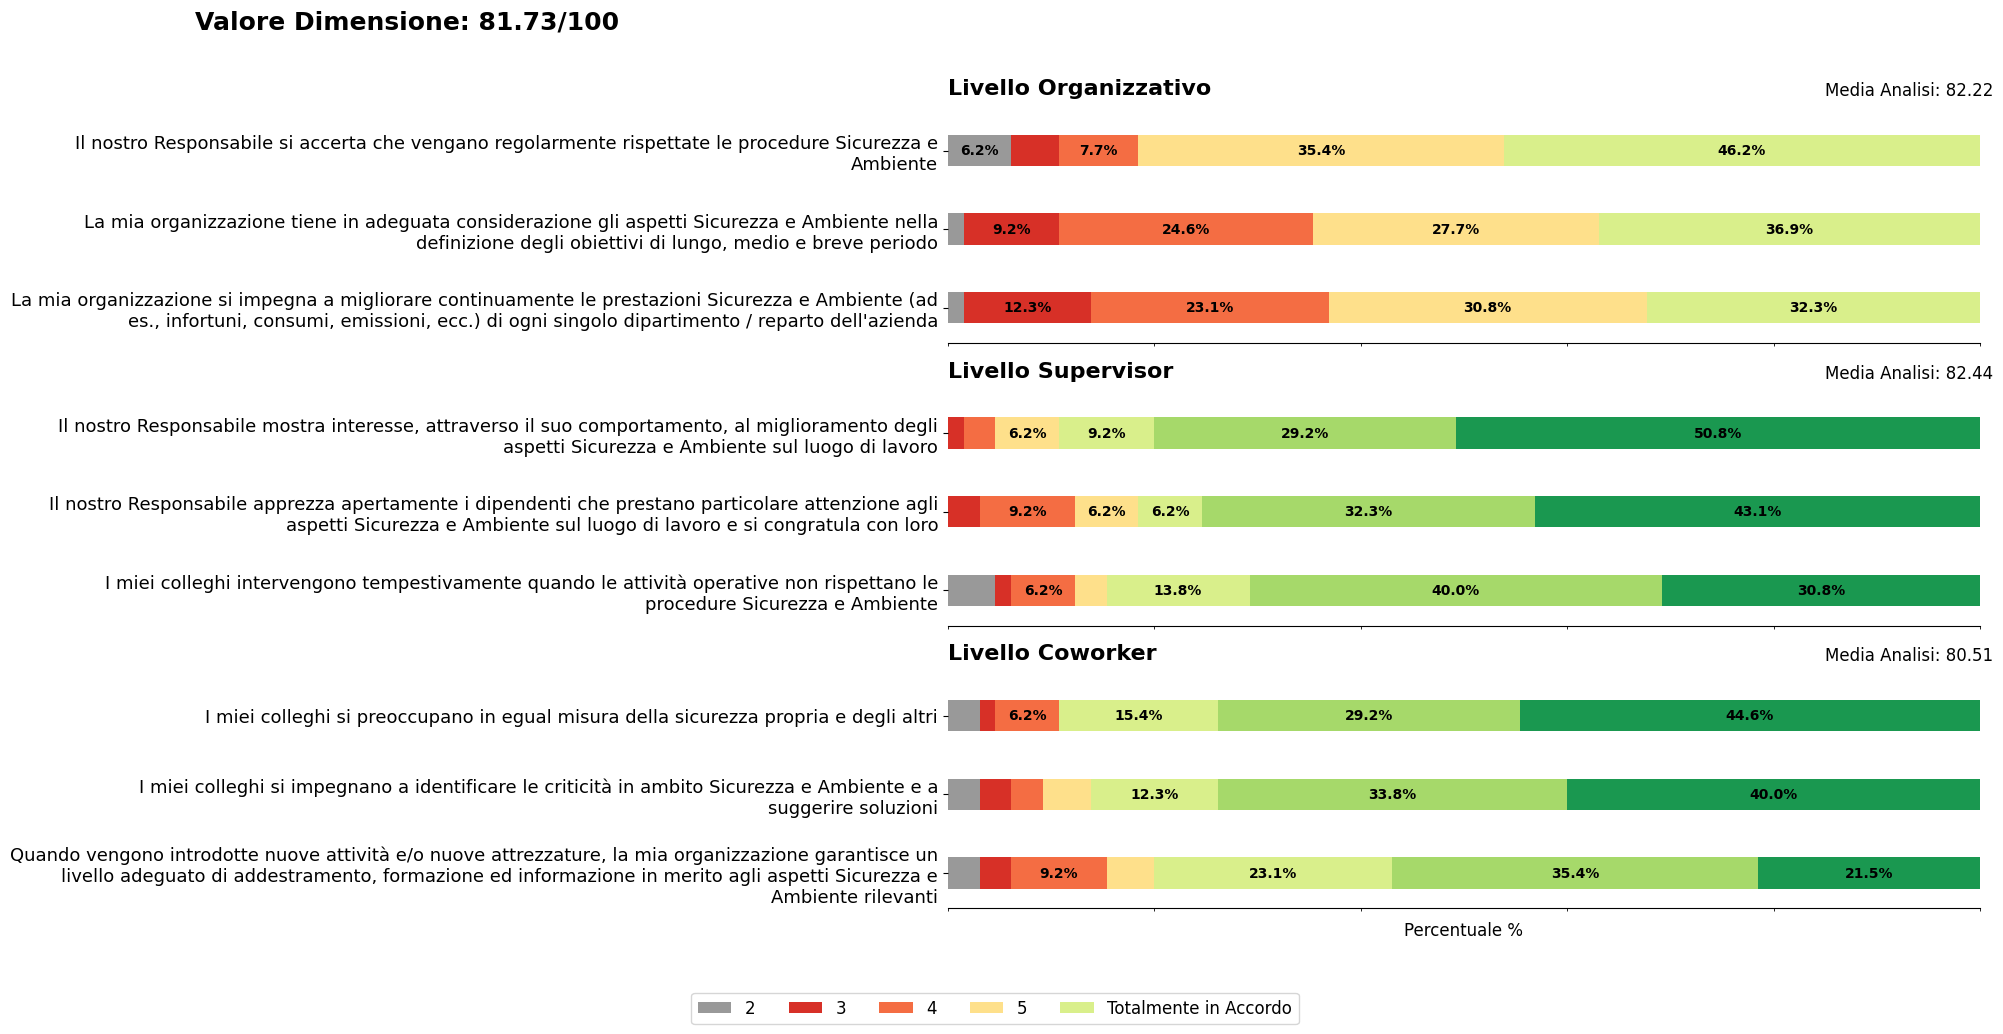

Generando grafici stratificati (età/anzianità)...


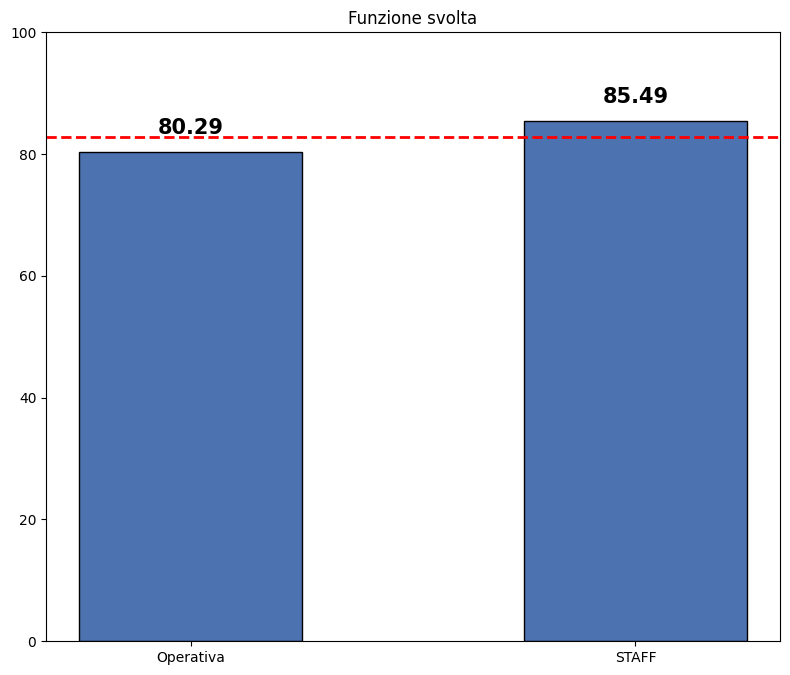

Set 5 completato!

=== SET 6: Sezioni [(68, 71), (71, 74), (74, 77)] ===
Generando grafico stacked...


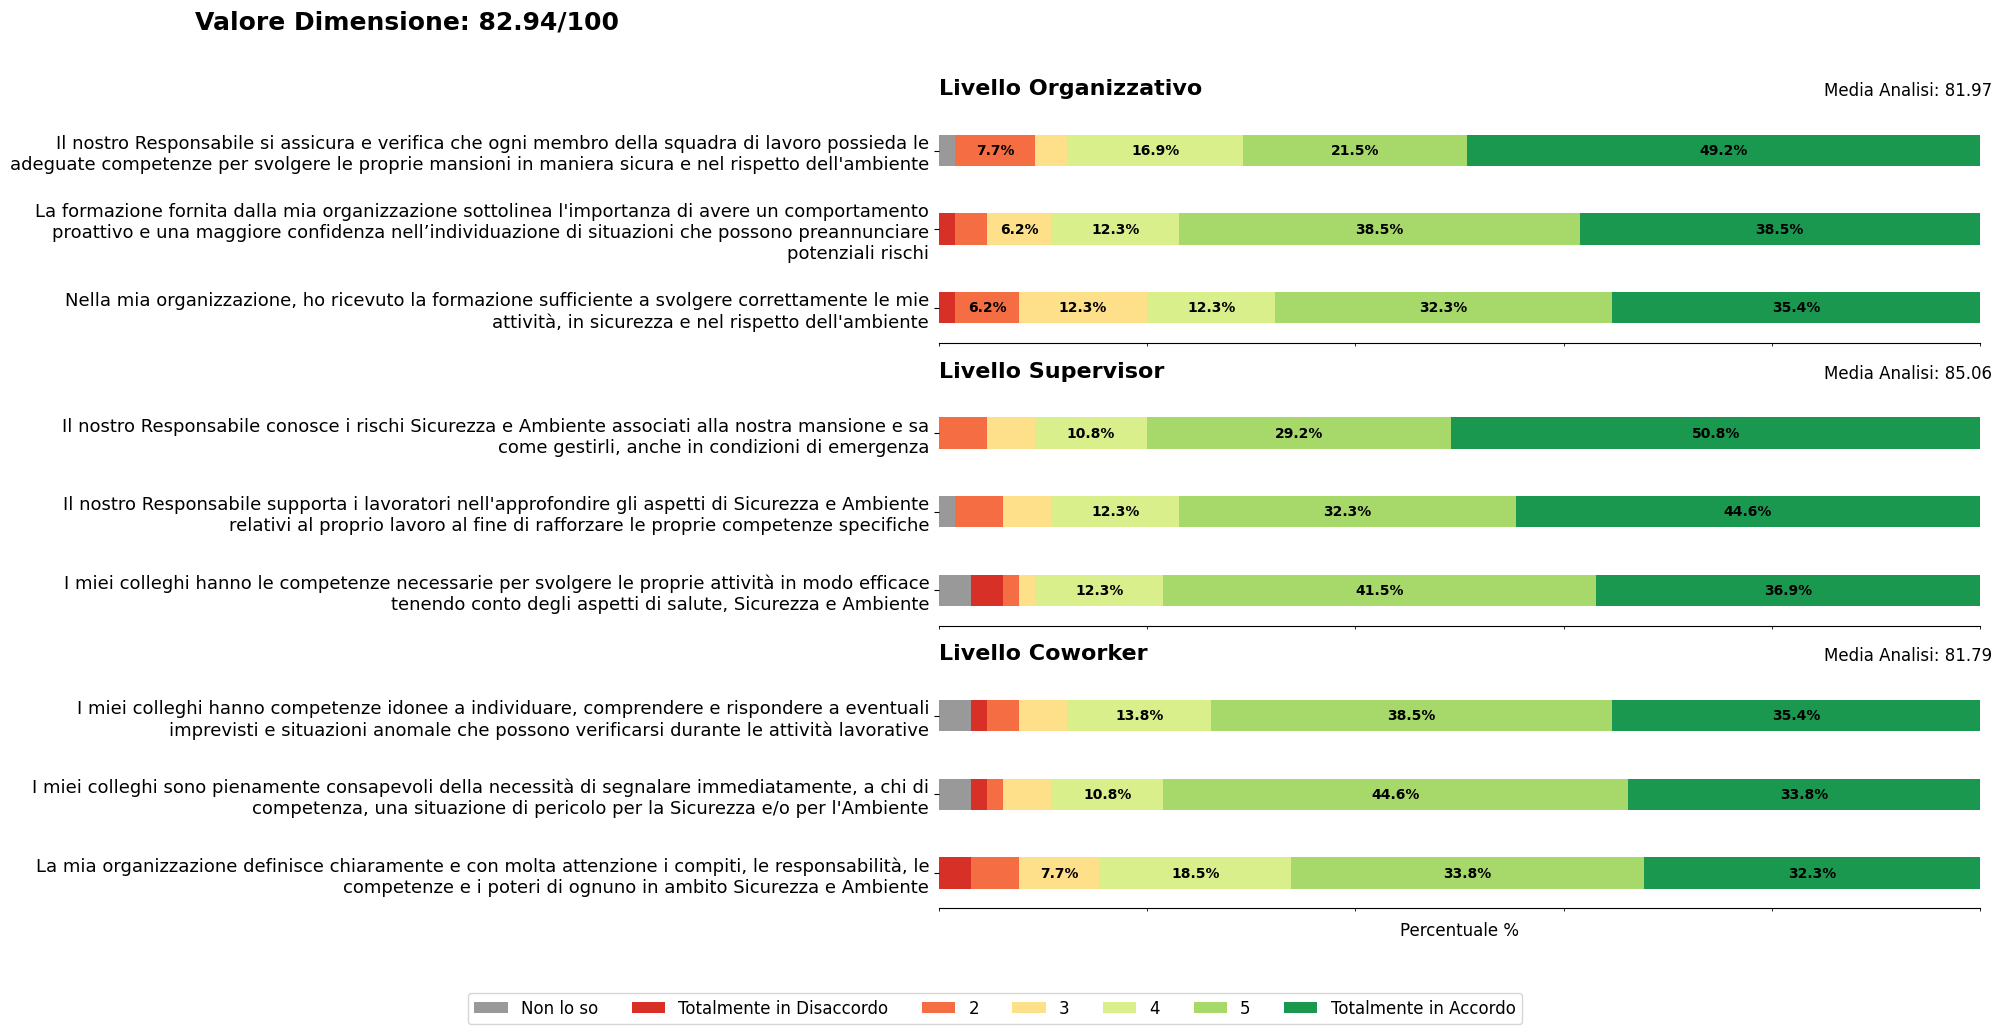

Generando grafici stratificati (età/anzianità)...


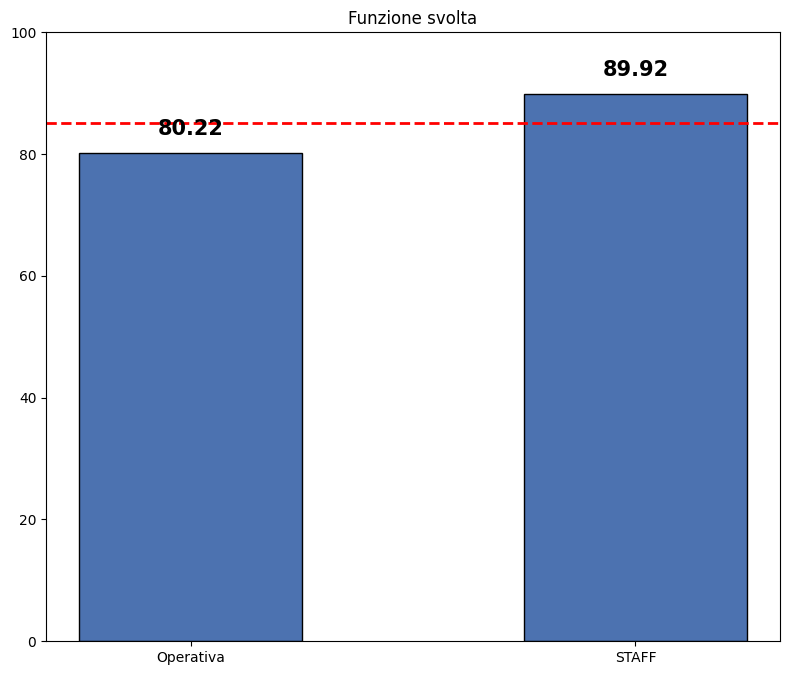

Set 6 completato!

=== SET 7: Sezioni [(77, 81)] ===
Generando grafico stacked...


Generando grafici stratificati (età/anzianità)...


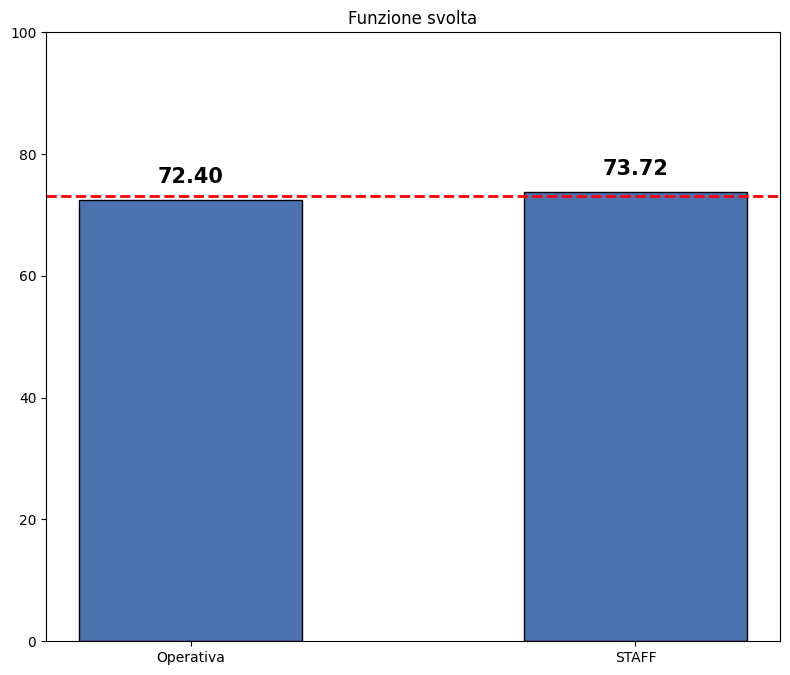

Set 7 completato!

=== SET 8: Sezioni [(81, 86)] ===
Generando grafico stacked...


Generando grafici stratificati (età/anzianità)...


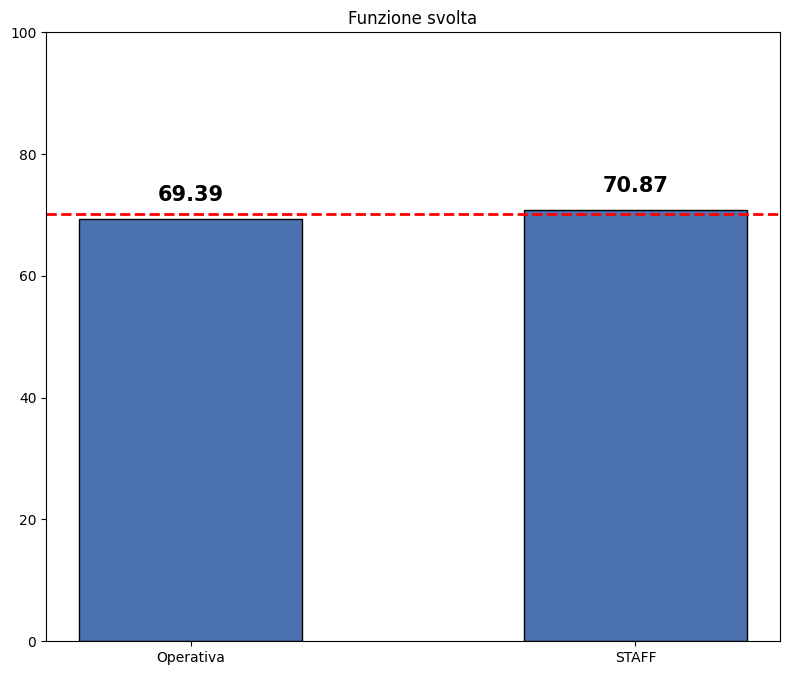

Set 8 completato!

Tutti i grafici sono stati generati!


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap

# ===== CONFIGURAZIONE GENERALE =====
# Definisci tutte le tue triplette di sezioni
tutte_le_triplette = [
    [(22, 25), (25, 28), (28, 31)],   # Prima tripletta
    [(31, 34), (34, 37), (37, 40)],  # Seconda tripletta
    [(41, 44), (44, 47), (47, 50)],  # Terza tripletta (esempio)
    [(50, 53), (53, 56), (56, 59)],  # Quarta tripletta (esempio)
    [(59, 62), (62, 65), (65, 68)],
    [(68, 71), (71, 74), (74, 77)],
    [(77,81)],
    [(81,86)]
]


# Titoli per ogni tripletta (per il grafico stacked)
titoli_triplette = ["Livello Organizzativo", "Livello Supervisor", "Livello Coworker"]

# Stratificazioni (età e anzianità)
stratificazioni = {
    'Funzione': {
        'col': 'Response.12',
        'ticks': ['Operativa', 'STAFF'],
        'title': 'Funzione svolta'
    },
}


# Configurazione grafico stacked
mappa_nomi = {
    0: 'Non lo so', 
    1: 'Totalmente in Disaccordo', 
    2: '2', 
    3: '3', 
    4: '4', 
    5: '5', 
    6: 'Totalmente in Accordo'
}
colori = ['#999999', '#d73027', '#f46d43', '#fee08b', '#d9ef8b', '#a6d96a', '#1a9850']

# ===== FUNZIONI =====
def get_summary_dataset(subset):
    rows = []
    for col in subset.columns:
        perc = subset[col].value_counts(normalize=True) * 100
        df_row = pd.DataFrame(perc).T
        df_row.index = [col]
        rows.append(df_row)
    
    dataset = pd.concat(rows).fillna(0)
    dataset = dataset.sort_index(axis=1, ascending=True)
    
    medie = subset.apply(pd.to_numeric, errors='coerce').replace(0, np.nan).mean()
    dataset['Media'] = medie* (100/6)
    dataset['Media_analisi'] = dataset['Media'].mean()
    
    return dataset

def get_stratified_means_full_benchmarks(data, subset_cols, stratifier_col):
    temp_df = data[subset_cols].apply(pd.to_numeric, errors='coerce').replace(0, np.nan)
    temp_df[stratifier_col] = data[stratifier_col]
    report_medie = temp_df.groupby(stratifier_col).mean().T *100/6
    
    for gruppo in report_medie.columns:
        report_medie[f'Media_eta_{gruppo}'] = report_medie[gruppo].mean()
    
    return report_medie.round(2)

def crea_grafico_stacked(sezioni, titoli, data, titolo_figura=""):
    """Crea un grafico stacked per una tripletta di sezioni (o singola sezione)"""
    # Genera i dataframe
    dfs = []
    for start, end in sezioni:
        df = get_summary_dataset(data.iloc[:, start:end]).sort_values(by=6, ascending=False)
        dfs.append(df)
    
    # Calcola la media delle medie analisi
    media_complessiva = pd.concat([df['Media_analisi'] for df in dfs]).unique().mean()
    
    # Determina il numero di subplot in base al numero di sezioni
    num_sezioni = len(sezioni)
    
    # Crea il grafico
    if num_sezioni == 1:
        # Caso singola sezione: un solo grafico
        fig, ax = plt.subplots(figsize=(20, 5))
        axes = [ax]  # Metti in lista per uniformità nel codice
    else:
        # Caso tripletta: 3 subplot
        fig, axes = plt.subplots(nrows=num_sezioni, ncols=1, figsize=(20, 10), sharex=True)
        if num_sezioni == 1:
            axes = [axes]  # Converti in lista se è un solo asse
    
    fig.suptitle(f"{titolo_figura}: {media_complessiva.round(2)}/100", 
                 fontsize=18, fontweight='bold', y=0.995, x=0.1, ha='left')
    
    for i, (df, titolo) in enumerate(zip(dfs, titoli)):
        ax = axes[i]
        df_plot = df.iloc[:, :-2].copy()
        labels_wrapped = [textwrap.fill(label, width=100) for label in df_plot.index]
        df_plot.index = labels_wrapped
        
        plot = df_plot.plot(kind='barh', stacked=True, color=colori, ax=ax, legend=False, width=0.4)
        
        for container in ax.containers:
            labels = [f'{v.get_width():.1f}%' if v.get_width() > 5 else '' for v in container]
            ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=10, fontweight='bold')
        
        ax.set_title(titolo, fontsize=16, fontweight='bold', loc='left', pad=15)
        ax.text(85, -0.7, f'Media Analisi: {df["Media"].mean():.2f}', fontsize=12)
        ax.tick_params(axis='y', labelsize=13) 
        ax.tick_params(axis='x', labelsize=11)
        ax.invert_yaxis() 
        ax.set_xlim(0, 100)
        ax.set_xlabel("Percentuale %", fontsize=12)
        ax.grid(axis='x', linestyle='--', alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.set_xticks([])
    
    # Legenda
    etichette_legenda = [mappa_nomi[int(c)] for c in dfs[0].columns[:-2]]
    fig.legend(
        labels=etichette_legenda,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.02),
        ncol=7,
        frameon=True,
        fontsize=12
    )
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.98]) 
    plt.show()
    
    return pd.concat(dfs)


def crea_grafico_stratificato(sezioni, stratificazioni, data, titolo_figura=""):
    risultati = {}
    
    for nome, config in stratificazioni.items():
        reports = []
        for start, end in sezioni:
            report = get_stratified_means_full_benchmarks(
                data, 
                data.iloc[:, start:end].columns,
                config['col']
            )
            reports.append(report)
        risultati[nome] = pd.concat(reports)
    
    if not any(len(risultati[nome]) > 0 for nome in risultati):
        print(f"Avviso: Nessun dato disponibile per {titolo_figura}")
        return risultati
    
    # Un solo asse perché c'è una sola stratificazione
    fig, ax = plt.subplots(figsize=(8, 7))
    fig.suptitle(titolo_figura, fontsize=16, fontweight='bold')
    
    for nome, config in stratificazioni.items():
        # 2 gruppi invece di 3
        if risultati[nome].shape[1] >= 2:
            medie = risultati[nome].iloc[:, :2].mean()
        else:
            medie = risultati[nome].mean()
        
        ax.bar(config['ticks'][:len(medie)], medie, width=0.5, color='#4c72b0', edgecolor = 'black')
        ax.set_title(config['title'])
        ax.bar_label(
            ax.containers[0], 
            labels=[f'{v.get_height():.2f}' for v in ax.containers[0]],
            color='black', 
            fontsize=15,
            fontweight='bold',
            padding= 10
        )
        ax.axhline(y=medie.mean(), color='red', linestyle='--', alpha=1, linewidth=2, label='Media')
        ax.set_ylim(0,100)

    
    plt.tight_layout()
    plt.show()
    
    return risultati

print(f"Generazione di {len(tutte_le_triplette)} set di grafici...\n")


for idx, sezioni in enumerate(tutte_le_triplette, 1):
    print(f"=== SET {idx}: Sezioni {sezioni} ===")
    
    # 1. Grafico stacked
    print(f"Generando grafico stacked...")
    df_completo = crea_grafico_stacked(
        sezioni, 
        ["Livello Organizzativo", "Livello Supervisor", "Livello Coworker"], 
        data,
        titolo_figura= 'Valore Dimensione'
    )
    
    # 2. Grafici stratificati
    print(f"Generando grafici stratificati (età/anzianità)...")
    risultati_strat = crea_grafico_stratificato(
        sezioni, 
        stratificazioni, 
        data
    )
    
    print(f"Set {idx} completato!\n")

print("Tutti i grafici sono stati generati!")

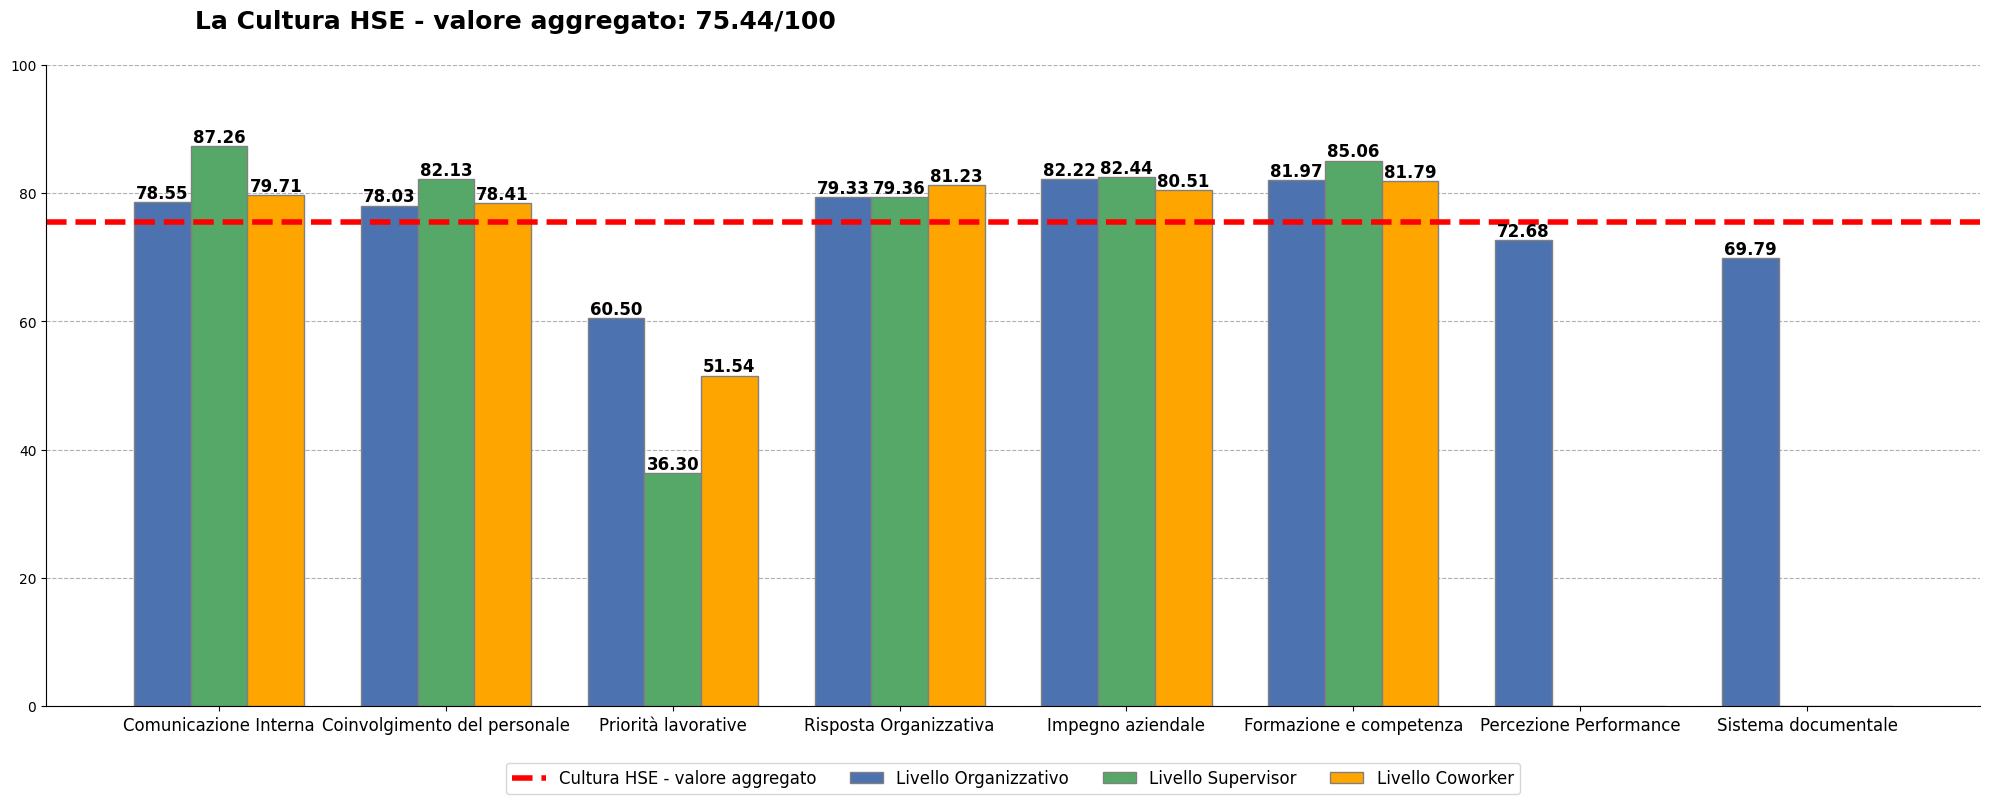

In [28]:
tutte_le_triplette = [
    [(22, 25), (25, 28), (28, 31)],   # Prima tripletta
    [(31, 34), (34, 37), (37, 40)],  # Seconda tripletta
    [(41, 44), (44, 47), (47, 50)],  # Terza tripletta (esempio)
    [(50, 53), (53, 56), (56, 59)],  # Quarta tripletta (esempio)
    [(59, 62), (62, 65), (65, 68)],
    [(68, 71), (71, 74), (74, 77)],
    [(77,81)],
    [(81,86)]
]
def crea_grafico_barre_raggruppate(tutte_le_triplette, titoli_triplette, data):
    medie_per_tripletta = []
    tutte_le_medie = []
    
    for sezioni in tutte_le_triplette:
        medie_sezione = []
        for start, end in sezioni:
            df_temp = get_summary_dataset(data.iloc[:, start:end]) 
            media = df_temp['Media_analisi'].unique()[0]
            medie_sezione.append(media)
            tutte_le_medie.append(media)  
        
    
        while len(medie_sezione) < 3:
            medie_sezione.append(np.nan)
        
        medie_per_tripletta.append(medie_sezione)
    
    # FIX Bug 1: media_totale calcolata globalmente dopo il loop
    media_totale = np.mean(tutte_le_medie)
    # Trasforma in array per facilità di manipolazione
    medie_array = np.array(medie_per_tripletta).T  # shape:(3, n_triplette)
    
    # Configurazione grafico
    barWidth = 0.25
    fig, ax = plt.subplots(figsize=(20, 8))
    
    # Posizioni delle barre
    n_triplette = len(tutte_le_triplette)
    br1 = np.arange(n_triplette)
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    
    # Colori per le tre sezioni
    colori_sezioni = ['#4c72b0', '#55a868', 'orange']
    
    # Etichette per le sezioni
    labels_sezioni = titoli_triplette if titoli_triplette else ['Sezione 1', 'Sezione 2', 'Sezione 3']
    
    # Crea le barre
    bars1 = ax.bar(br1, np.nan_to_num(medie_array[0], nan=0), color=colori_sezioni[0], width=barWidth,
                   edgecolor='grey', label=labels_sezioni[0])
    bars2 = ax.bar(br2, np.nan_to_num(medie_array[1], nan=0), color=colori_sezioni[1], width=barWidth,
                   edgecolor='grey', label=labels_sezioni[1])
    bars3 = ax.bar(br3, np.nan_to_num(medie_array[2], nan=0), color=colori_sezioni[2], width=barWidth,
                   edgecolor='grey', label=labels_sezioni[2])
    
    # Aggiungi i valori sopra le barre (solo se non sono NaN)
    for i, bars in enumerate([bars1, bars2, bars3]):
        labels = []
        for j, v in enumerate(bars):
            if not np.isnan(medie_array[i][j]):
                labels.append(f'{v.get_height():.2f}')
            else:
                labels.append('')
        ax.bar_label(bars, labels=labels, label_type='edge', color='black', fontsize=12, fontweight='bold')
    
    # Etichette sull'asse x
    ax.set_xticks([r + barWidth for r in range(n_triplette)])
    ax.set_xticklabels(['Comunicazione Interna', 'Coinvolgimento del personale',
                        'Priorità lavorative', 'Risposta Organizzativa',
                        'Impegno aziendale', 'Formazione e competenza',
                        'Percezione Performance', 'Sistema documentale'], fontsize=12)
    
    # FIX Bug 1: ora media_totale è il valore globale corretto
    ax.axhline(y=media_totale, color='red', linestyle='--', alpha=1, linewidth=4, label='Cultura HSE - valore aggregato')
    
    # Legenda
    ax.legend(fontsize=12, loc='lower center',
              bbox_to_anchor=(0.5, -0.15),
              ncol=4,
              frameon=True)
    
    ax.set_ylim(0, 100)
    
    # Griglia
    ax.grid(axis='y', linestyle='--')
    ax.set_axisbelow(True)
    
    # Rimuovi bordi superiore e destro
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.suptitle(f"La Cultura HSE - valore aggregato: {media_totale.round(2)}/100", 
                 fontsize=18, fontweight='bold', y=0.995, x=0.1, ha='left')
    
    plt.tight_layout()
    plt.show()
    
    # Restituisci le medie per riferimento
    return pd.DataFrame(
        medie_array.T,
        columns=labels_sezioni,
        index=['Comunicazione Interna', 'Coinvolgimento del personale',
               'Priorità lavorative', 'Risposta Organizzativa',
               'Impegno aziendale', 'Formazione e competenza',
               'Percezione Performance', 'Sistema documentale']
    )

df = crea_grafico_barre_raggruppate(tutte_le_triplette, titoli_triplette, data)

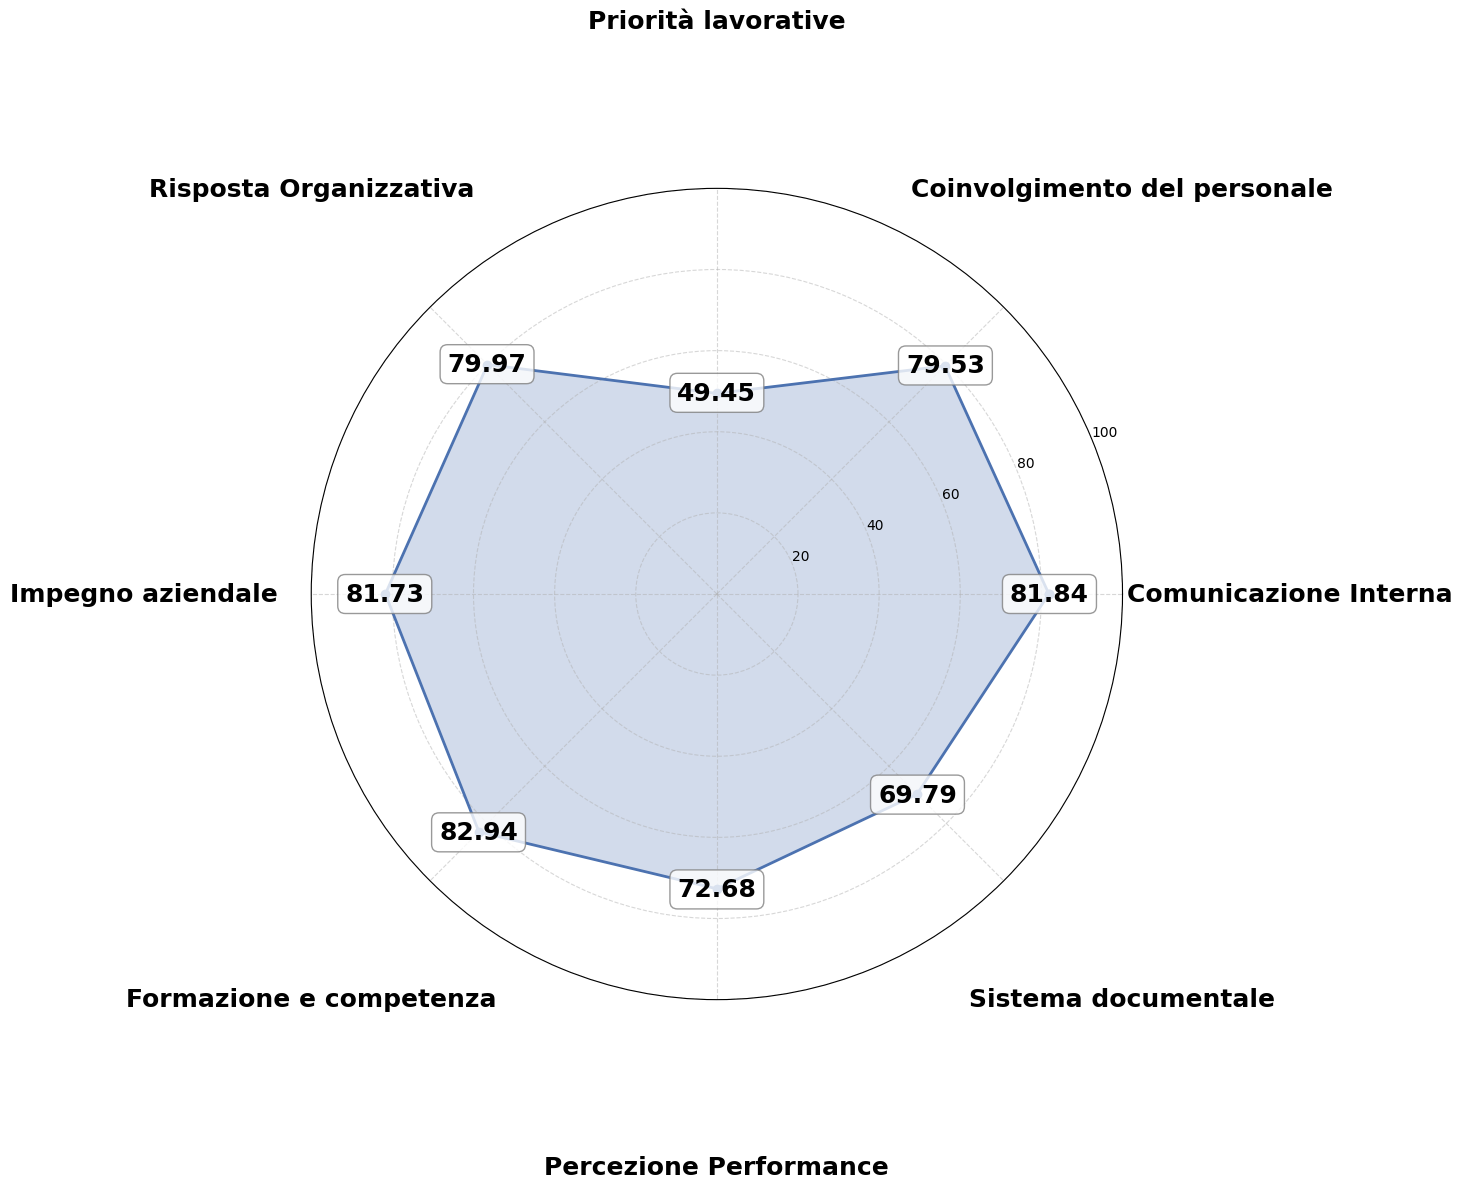


Valori del diagramma di Kiviat:
                      Categoria      Media
0         Comunicazione Interna  81.841245
1  Coinvolgimento del personale  79.527244
2           Priorità lavorative  49.445911
3        Risposta Organizzativa  79.972433
4             Impegno aziendale  81.725033
5       Formazione e competenza  82.940748
6        Percezione Performance  72.678065
7           Sistema documentale  69.791675


In [29]:
def crea_diagramma_kiviat(tutte_le_triplette, labels_categorie, data):
    """
    Crea un diagramma di Kiviat (radar chart) con le medie delle triplette
    """
    # Calcola le medie per ogni tripletta
    medie_categorie = []
    for sezioni in tutte_le_triplette:
        medie_sezione = []
        for start, end in sezioni:
            df = get_summary_dataset(data.iloc[:, start:end])
            media = df['Media_analisi'].unique()[0]
            medie_sezione.append(media)
        media_tripletta = np.mean(medie_sezione)
        medie_categorie.append(media_tripletta)

    # Calcola la media totale (era undefined nel codice originale)
    media_totale = np.mean(medie_categorie)

    num_vars = len(labels_categorie)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Chiudi il cerchio (aggiungi il primo valore alla fine)
    medie_categorie += medie_categorie[:1]
    angles += angles[:1]

    # Crea il grafico
    fig, ax = plt.subplots(figsize=(14, 12), subplot_kw=dict(projection='polar'))

    # Plotta i dati
    ax.plot(angles, medie_categorie, 'o-', linewidth=2, color='#4c72b0', label='Media Analisi')
    ax.fill(angles, medie_categorie, alpha=0.25, color='#4c72b0')

    # Aggiungi i valori sui punti
    for angle, media in zip(angles[:-1], medie_categorie[:-1]):
        ax.text(angle, media + 0.15, f'{media:.2f}',
                ha='center', va='center', fontsize=18, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.8))

    # Imposta le etichette
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels_categorie, fontsize=18, fontweight='bold')
    ax.tick_params(axis='x', pad=110)

    # Imposta i limiti radiali
    ax.set_ylim(0, 100)

    # Aggiungi griglia
    ax.grid(True, linestyle='--', alpha=0.5)

    #fig.suptitle(f"La Cultura HSE - valore aggregato: {media_totale.round(2)}/100",fontsize=18, fontweight='bold', y=0.995, x=0.1, ha='left')

    plt.tight_layout()
    plt.show()

    # Restituisci il dataframe con i risultati
    return pd.DataFrame({
        'Categoria': labels_categorie,
        'Media': medie_categorie[:-1]  # Rimuovi l'ultimo elemento duplicato
    })


# Definisci le label
labels_categorie = [
    'Comunicazione Interna',
    'Coinvolgimento del personale',
    'Priorità lavorative',
    'Risposta Organizzativa',
    'Impegno aziendale',
    'Formazione e competenza',
    'Percezione Performance',
    'Sistema documentale'
]

# Crea il diagramma
df_kiviat = crea_diagramma_kiviat(tutte_le_triplette, labels_categorie, data)
print("\nValori del diagramma di Kiviat:")
print(df_kiviat)

Create powerpoint

Media totale globale: 74.74/100


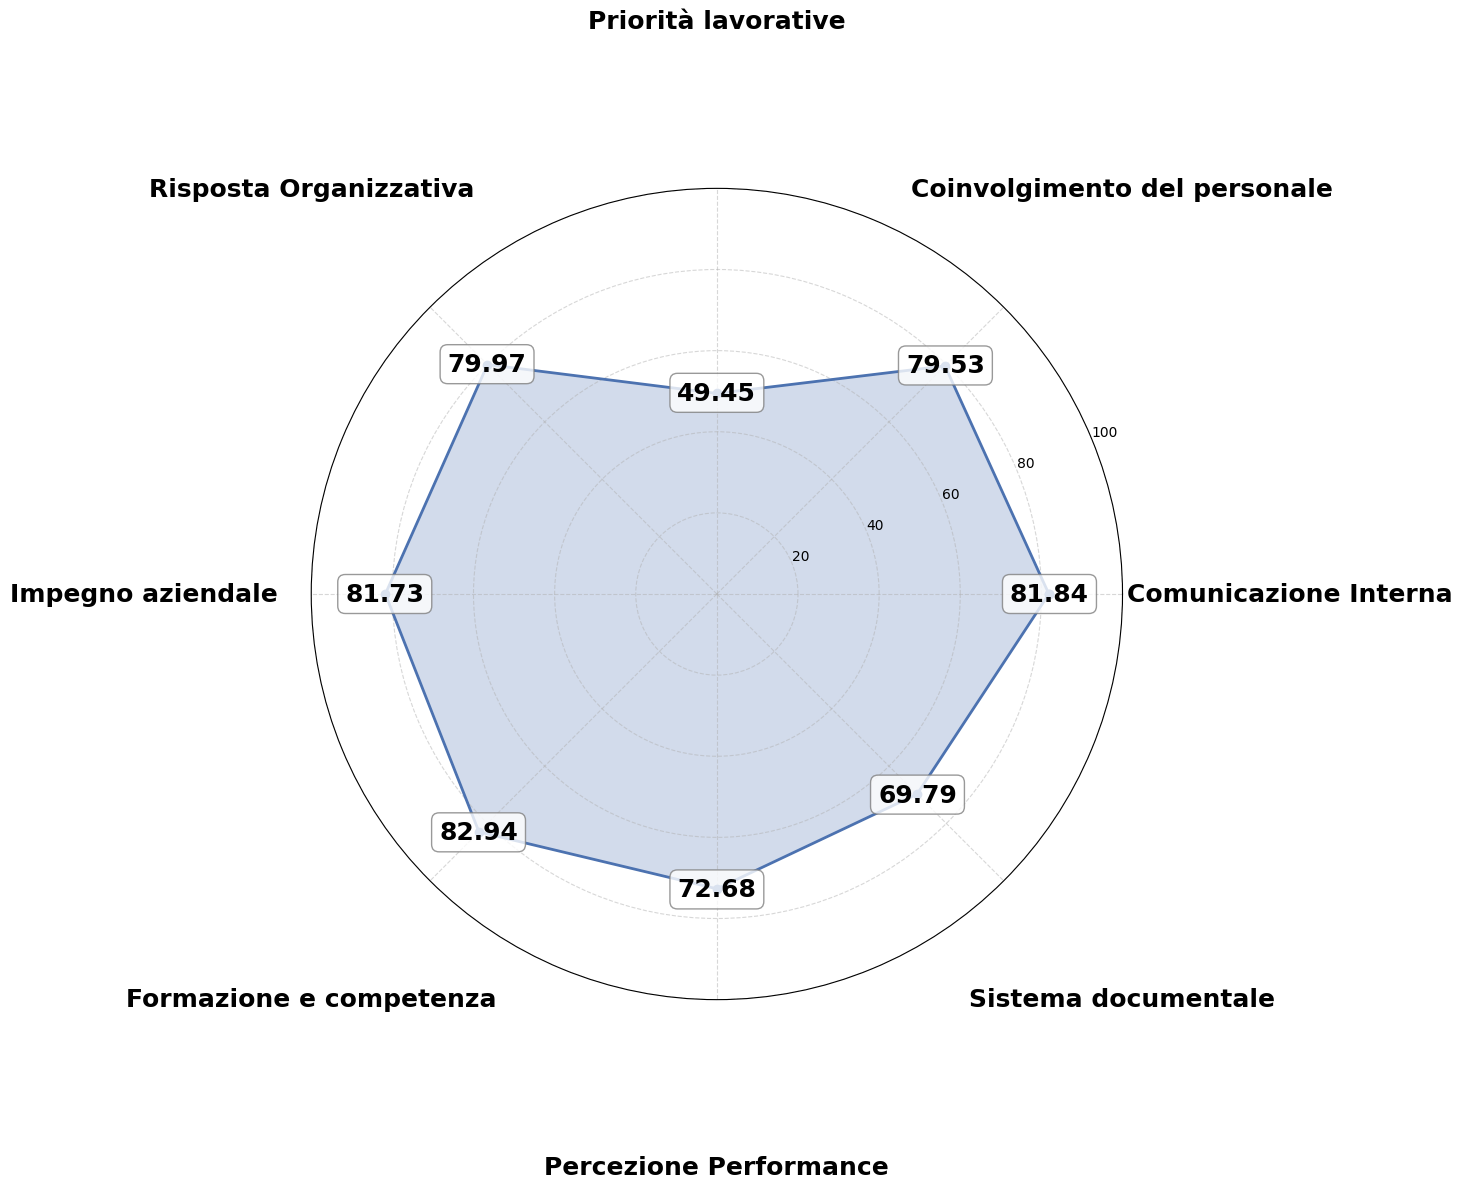

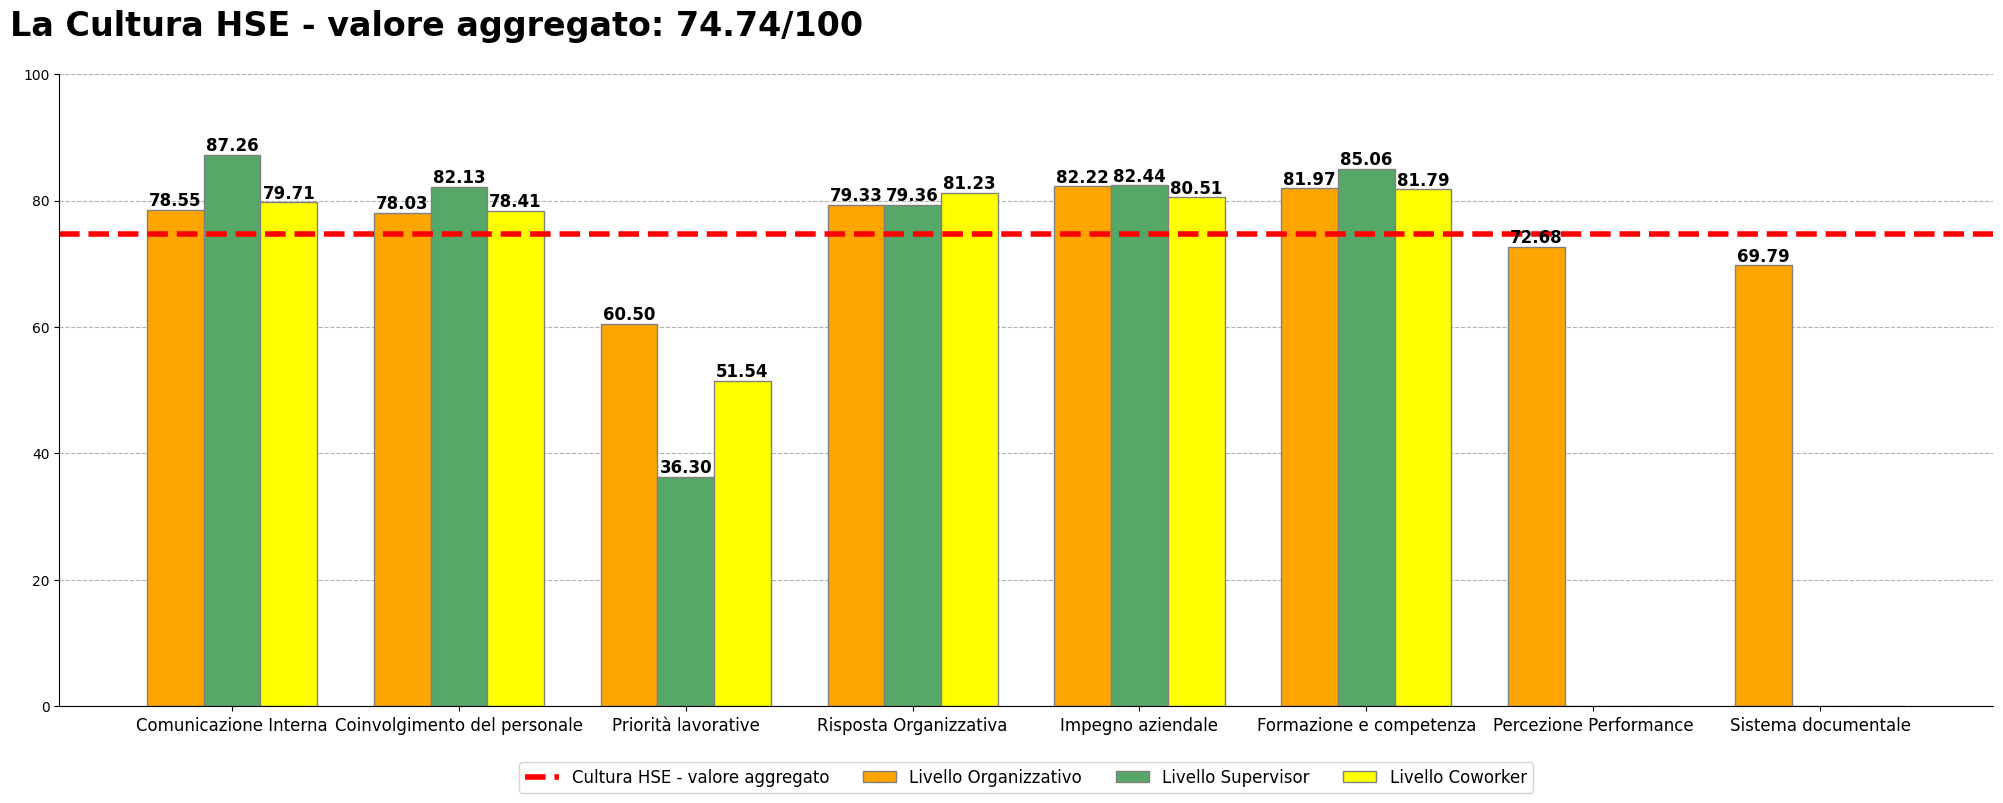

=== SET 1: Sezioni [(22, 25), (25, 28), (28, 31)] ===


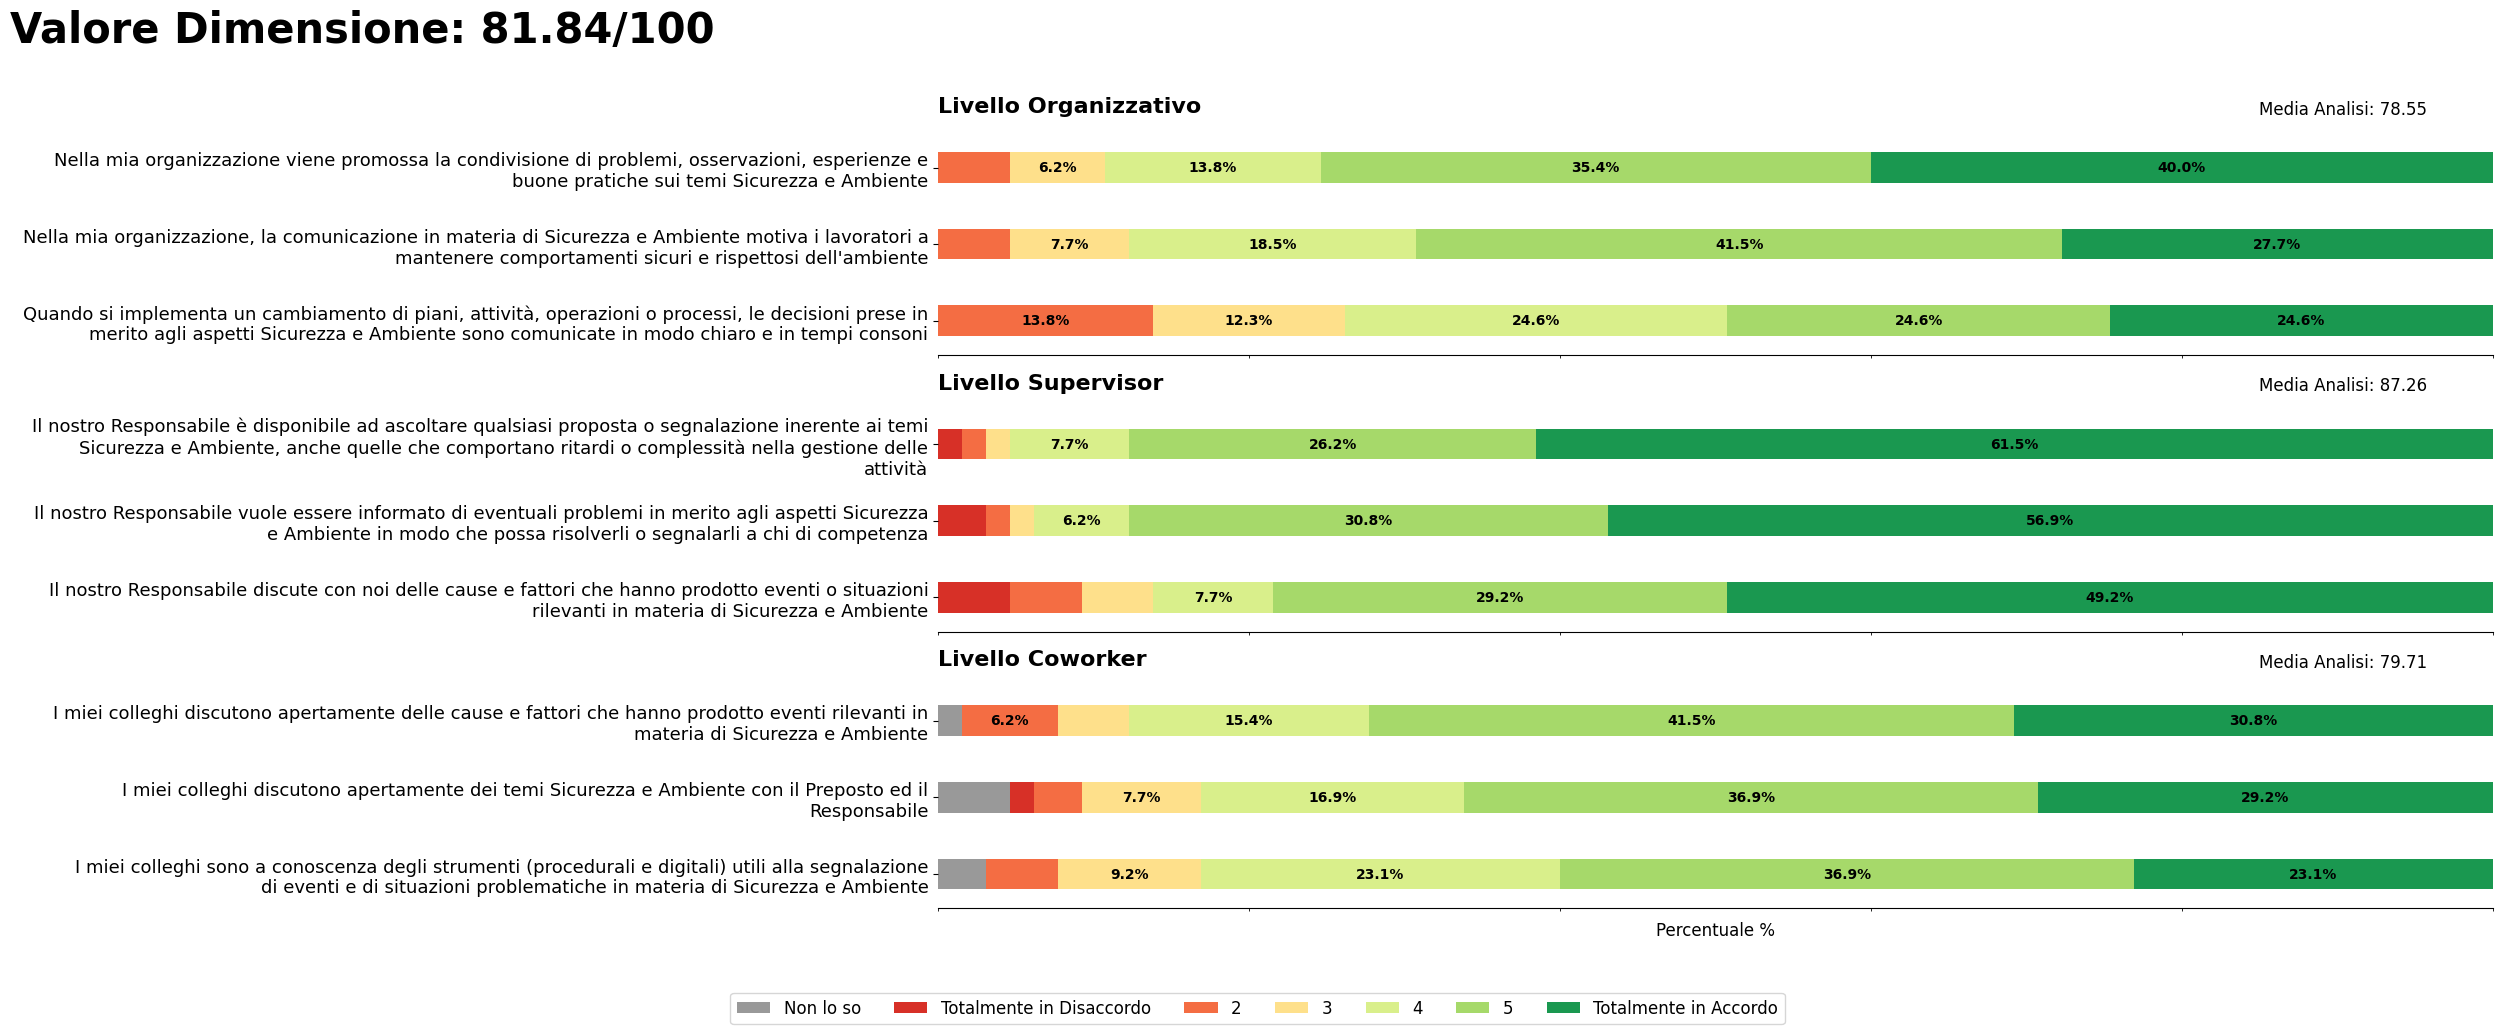

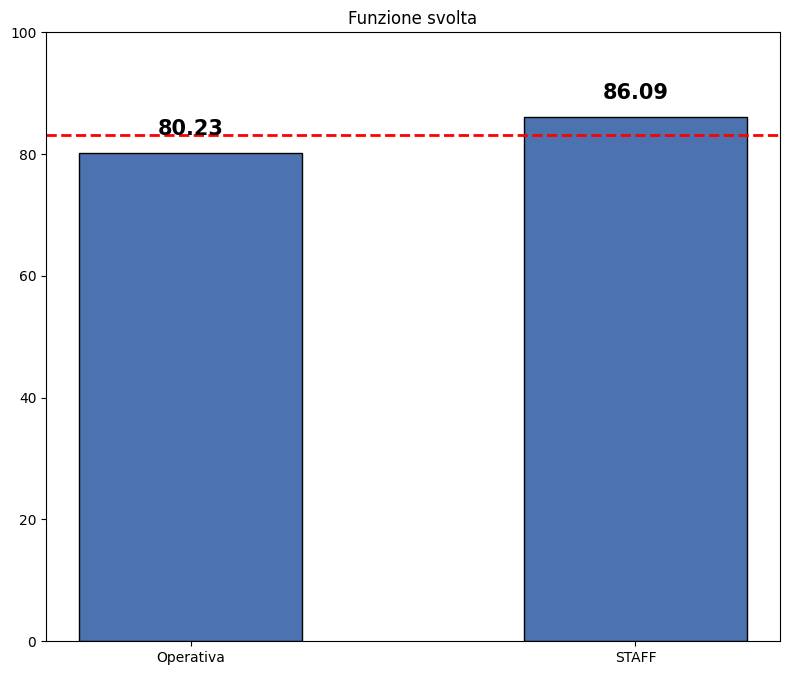

=== SET 2: Sezioni [(31, 34), (34, 37), (37, 40)] ===


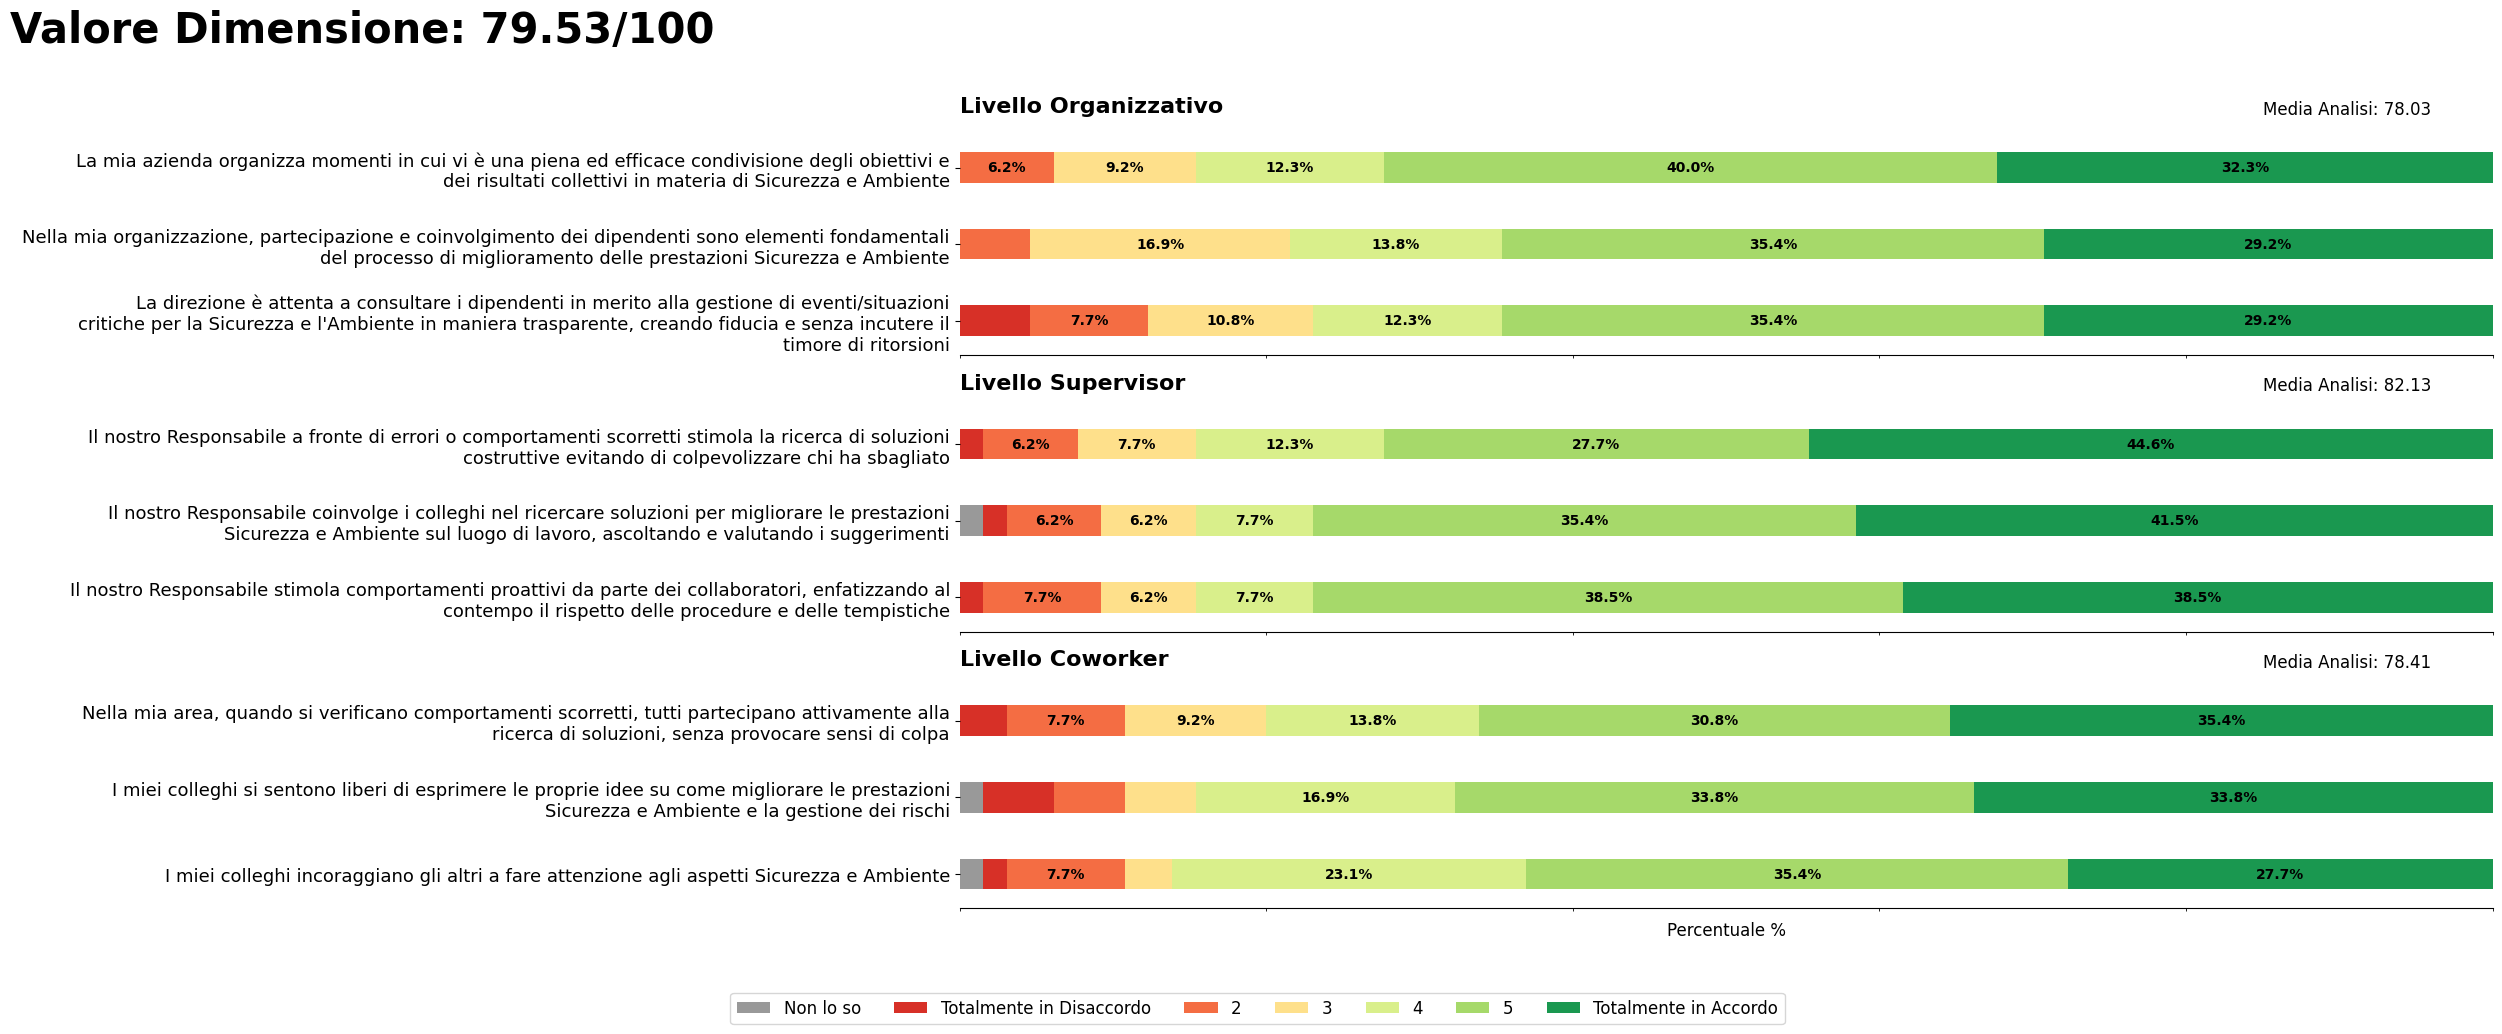

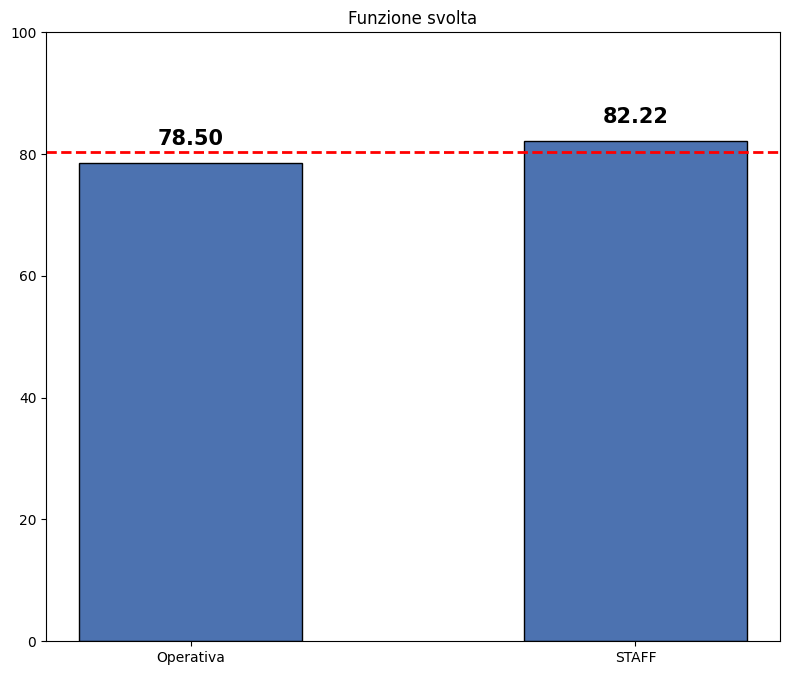

=== SET 3: Sezioni [(41, 44), (44, 47), (47, 50)] ===


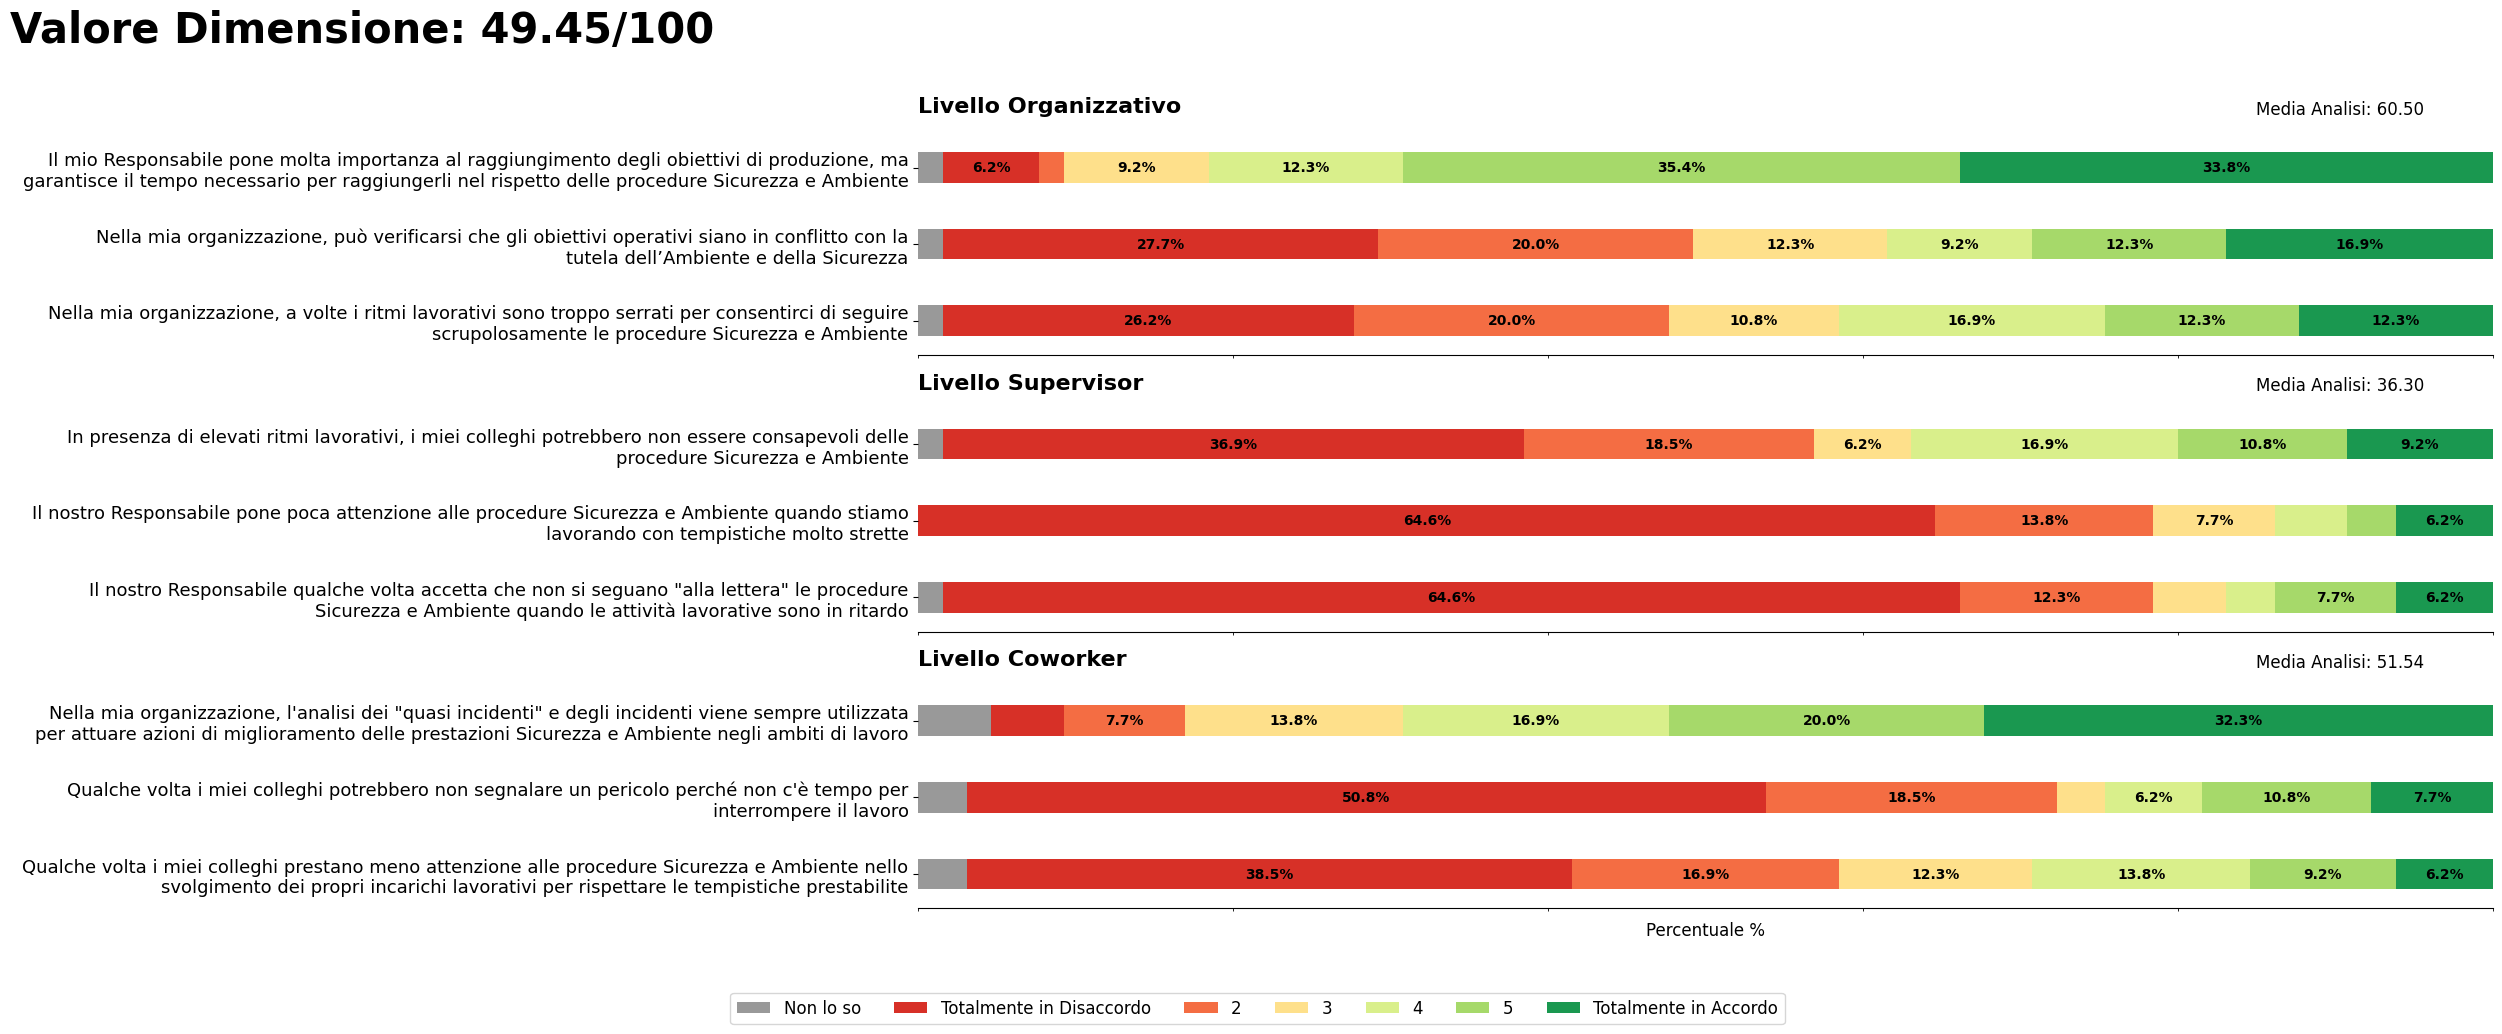

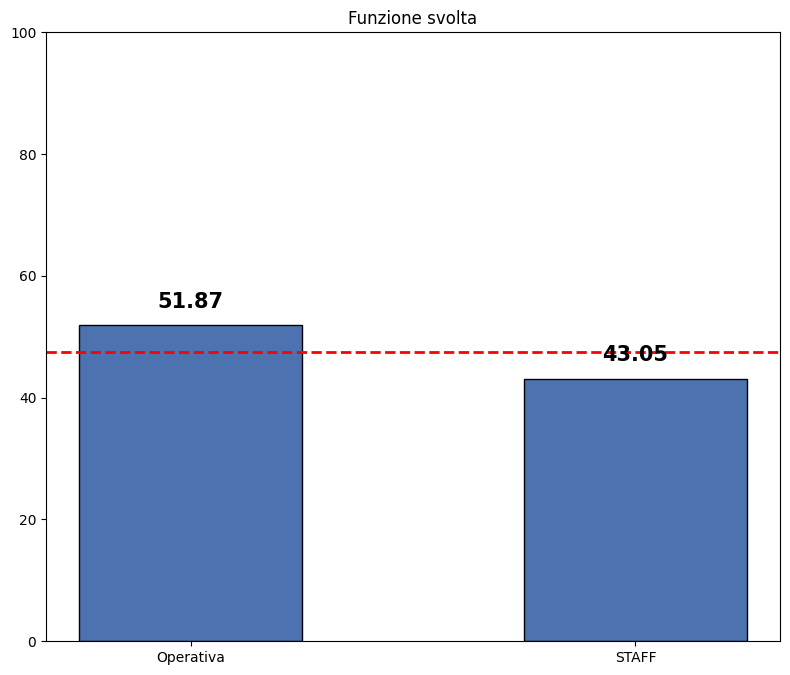

=== SET 4: Sezioni [(50, 53), (53, 56), (56, 59)] ===


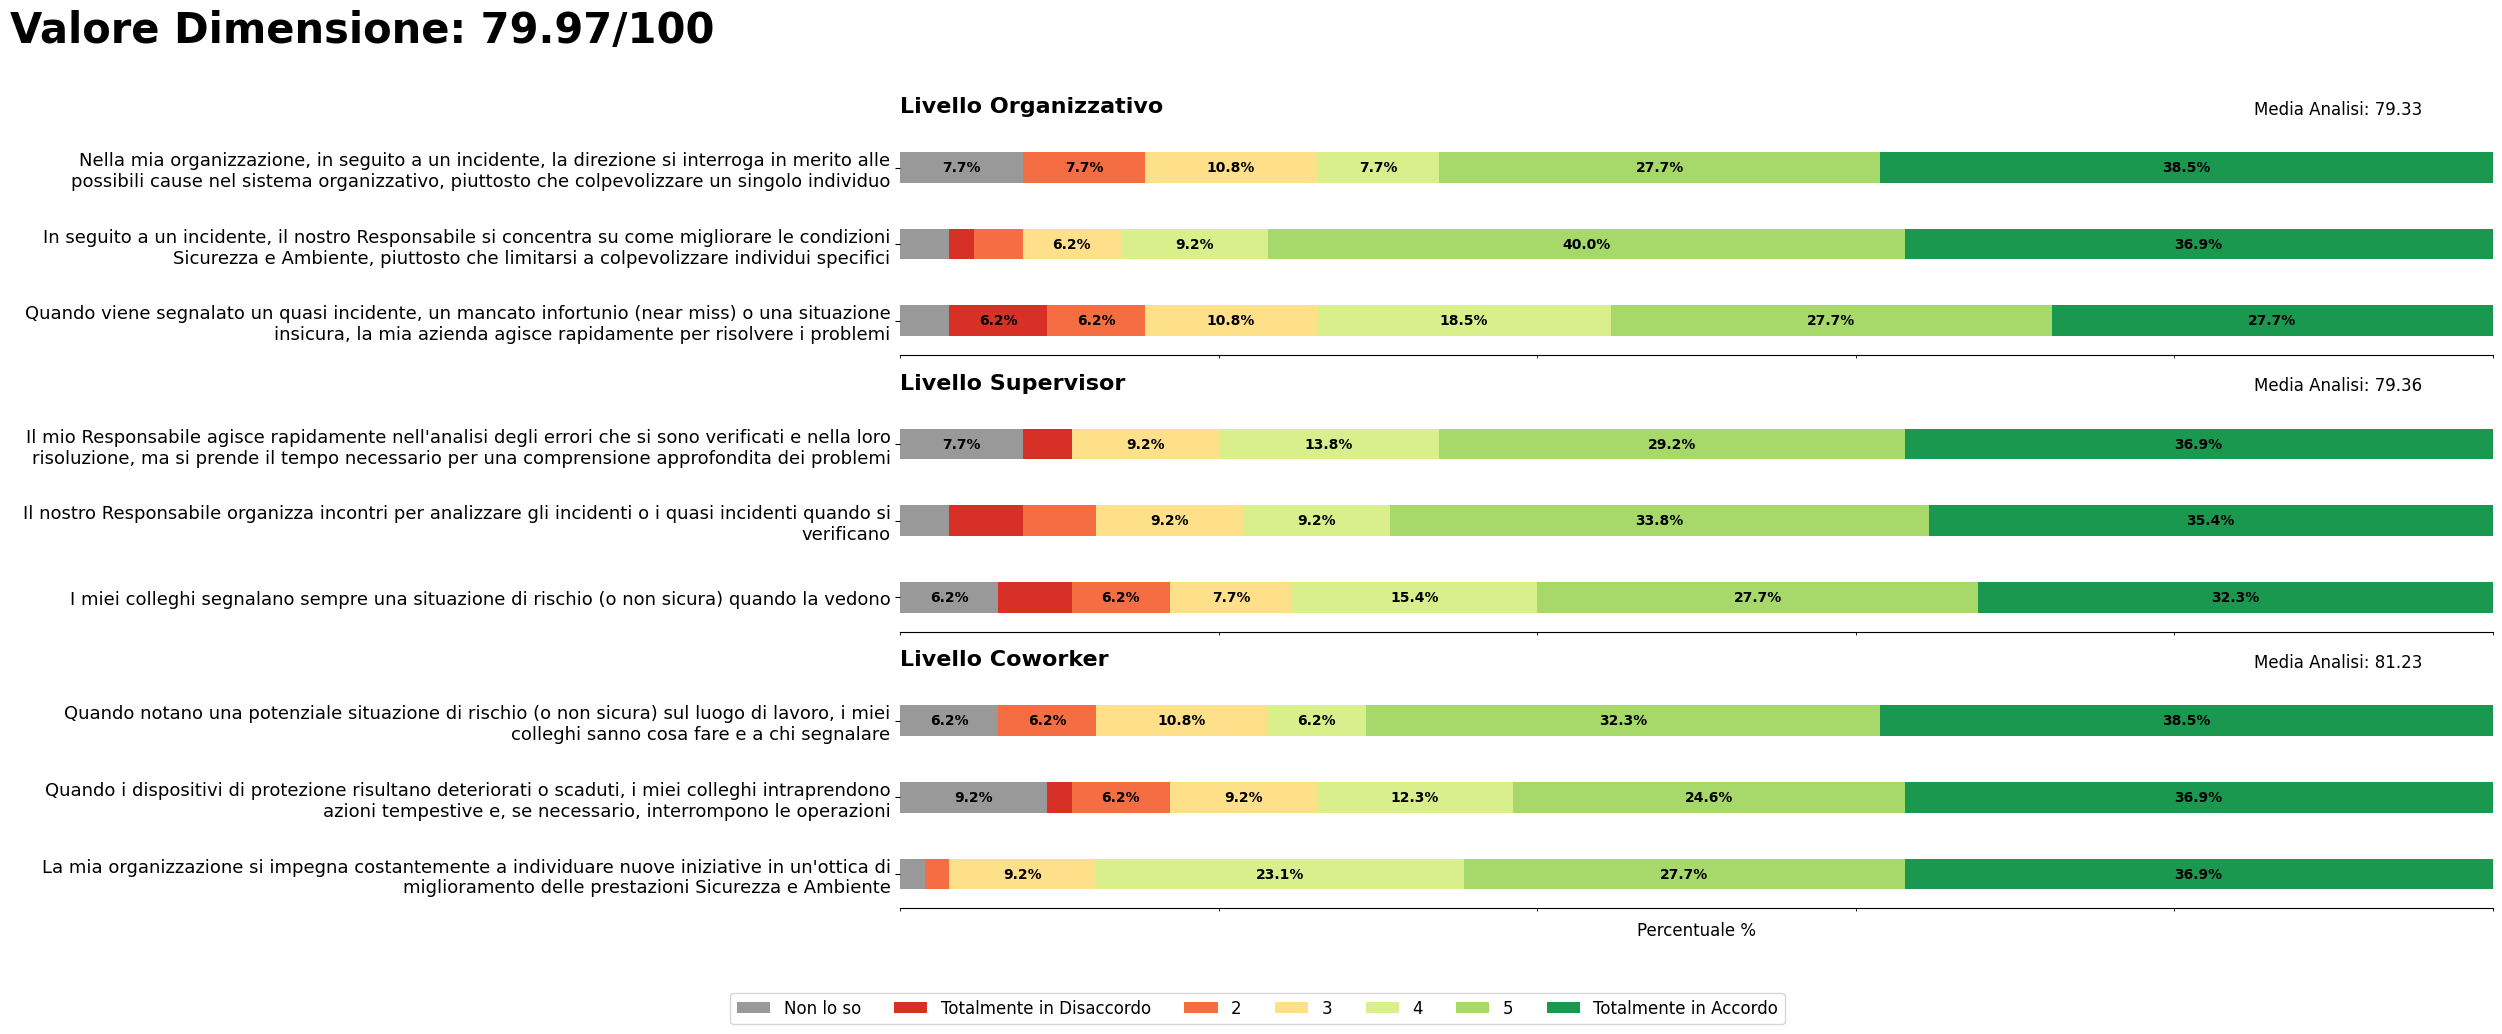

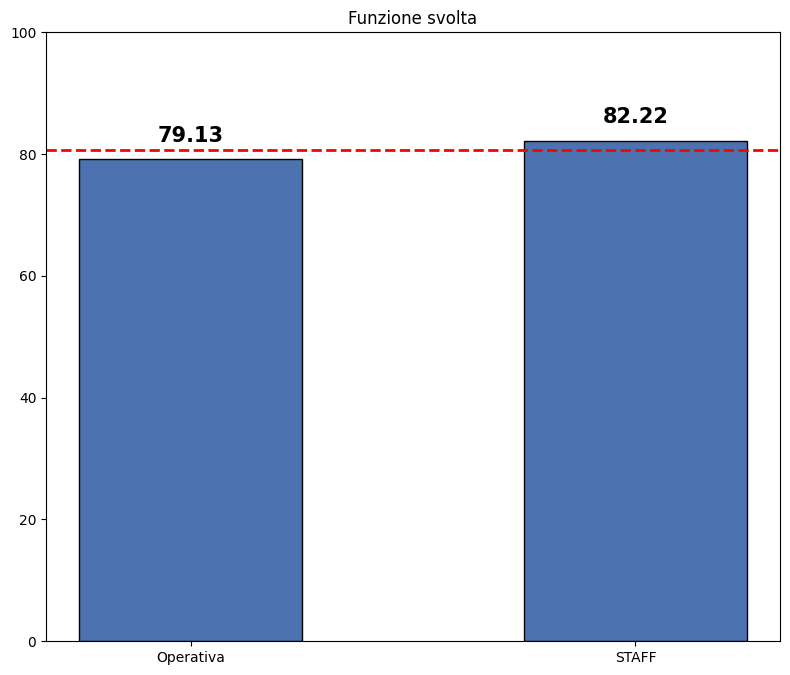

=== SET 5: Sezioni [(59, 62), (62, 65), (65, 68)] ===


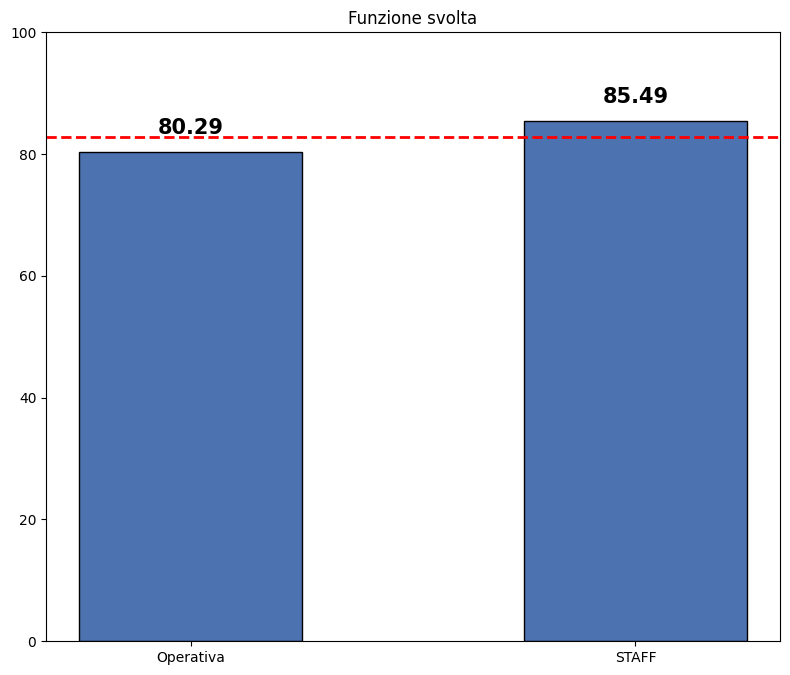

=== SET 6: Sezioni [(68, 71), (71, 74), (74, 77)] ===


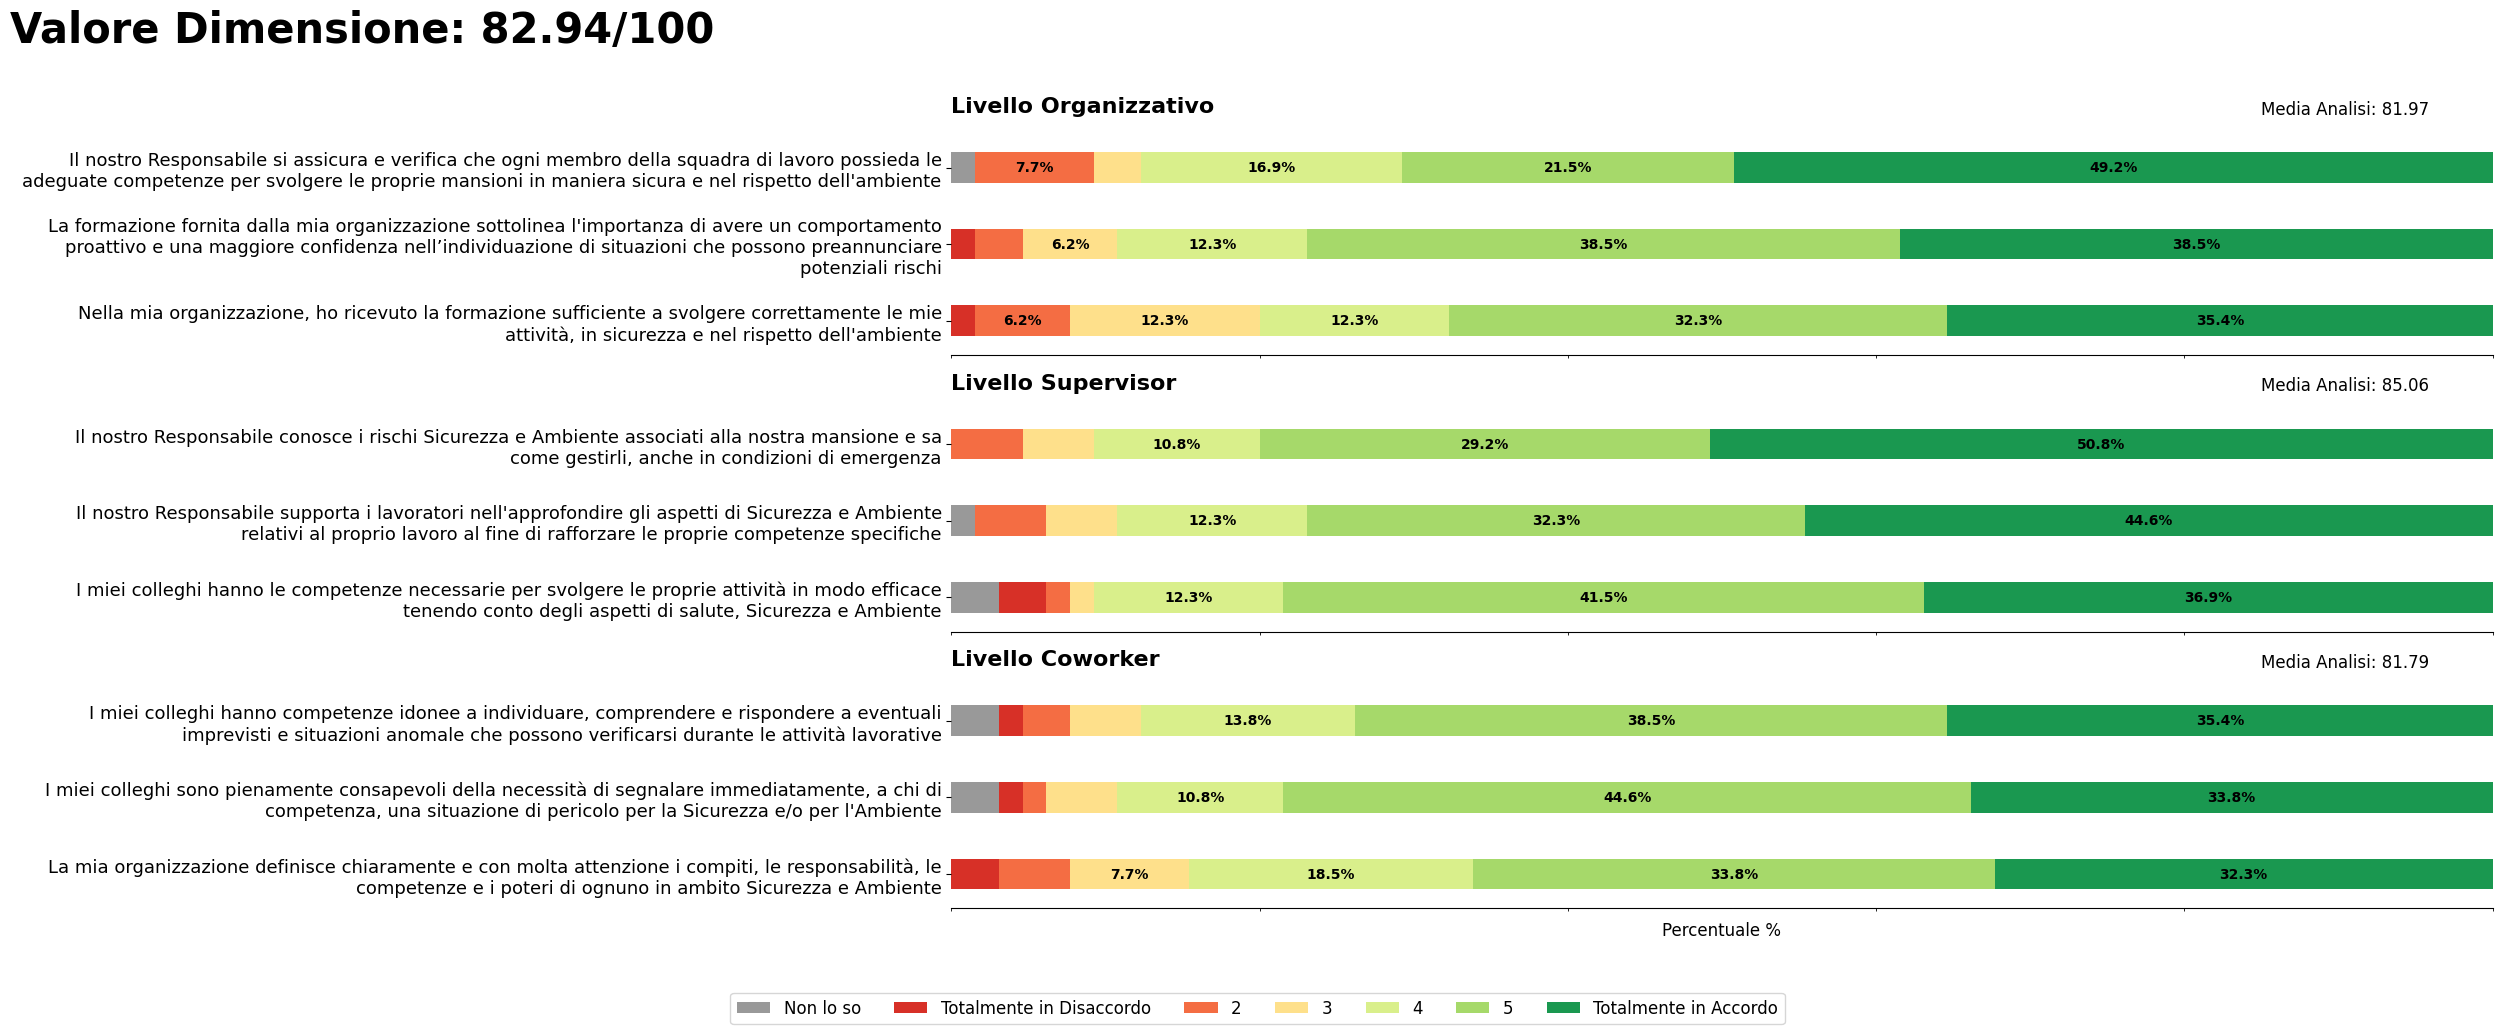

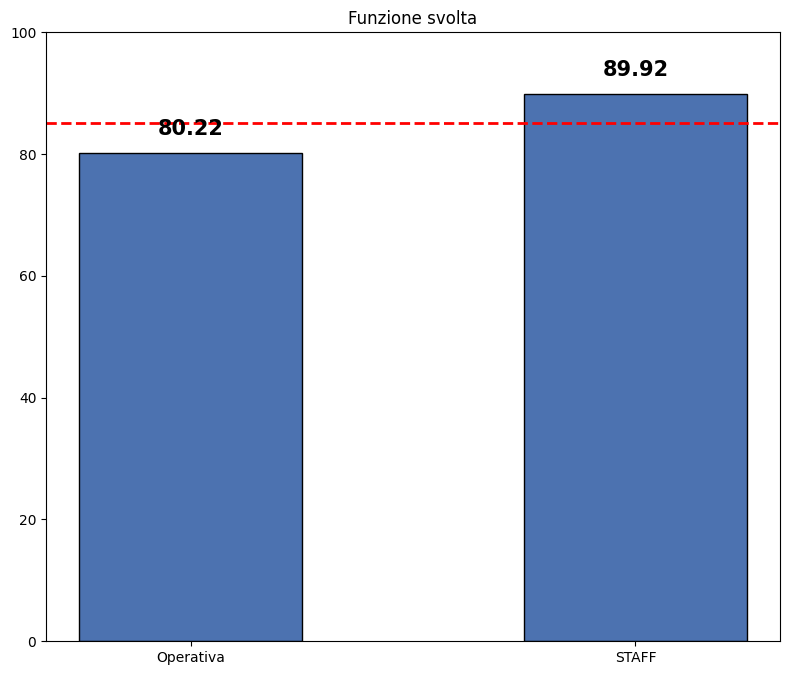

=== SET 7: Sezioni [(77, 81)] ===


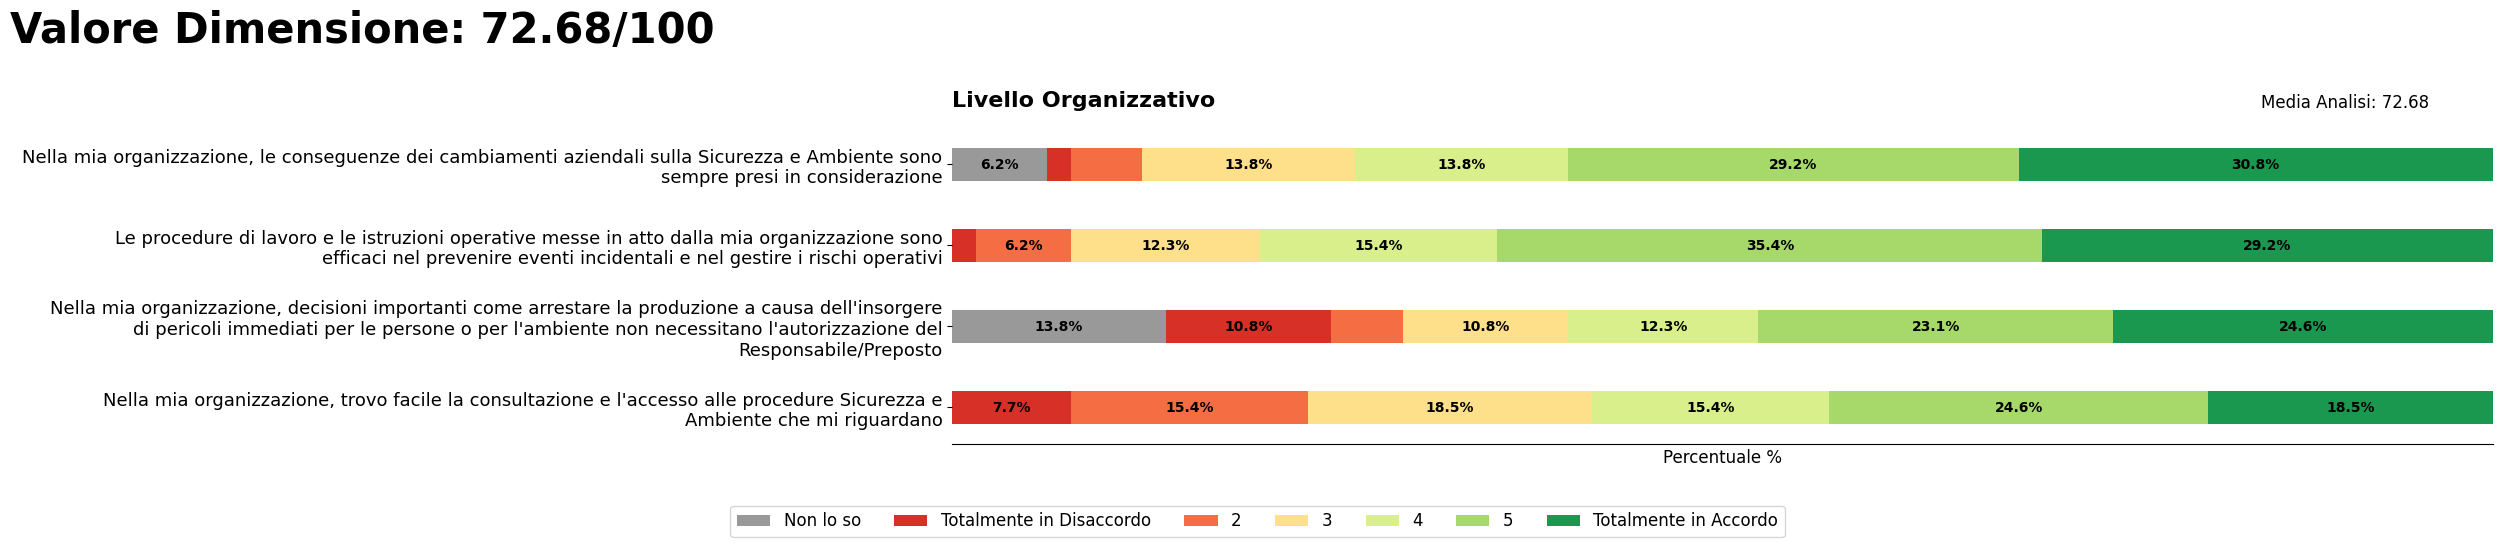

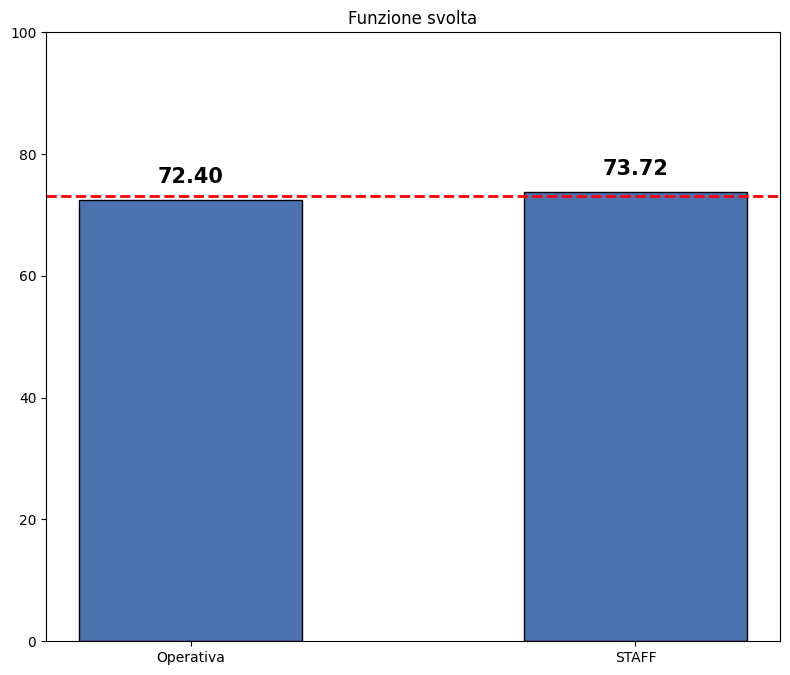

=== SET 8: Sezioni [(81, 86)] ===


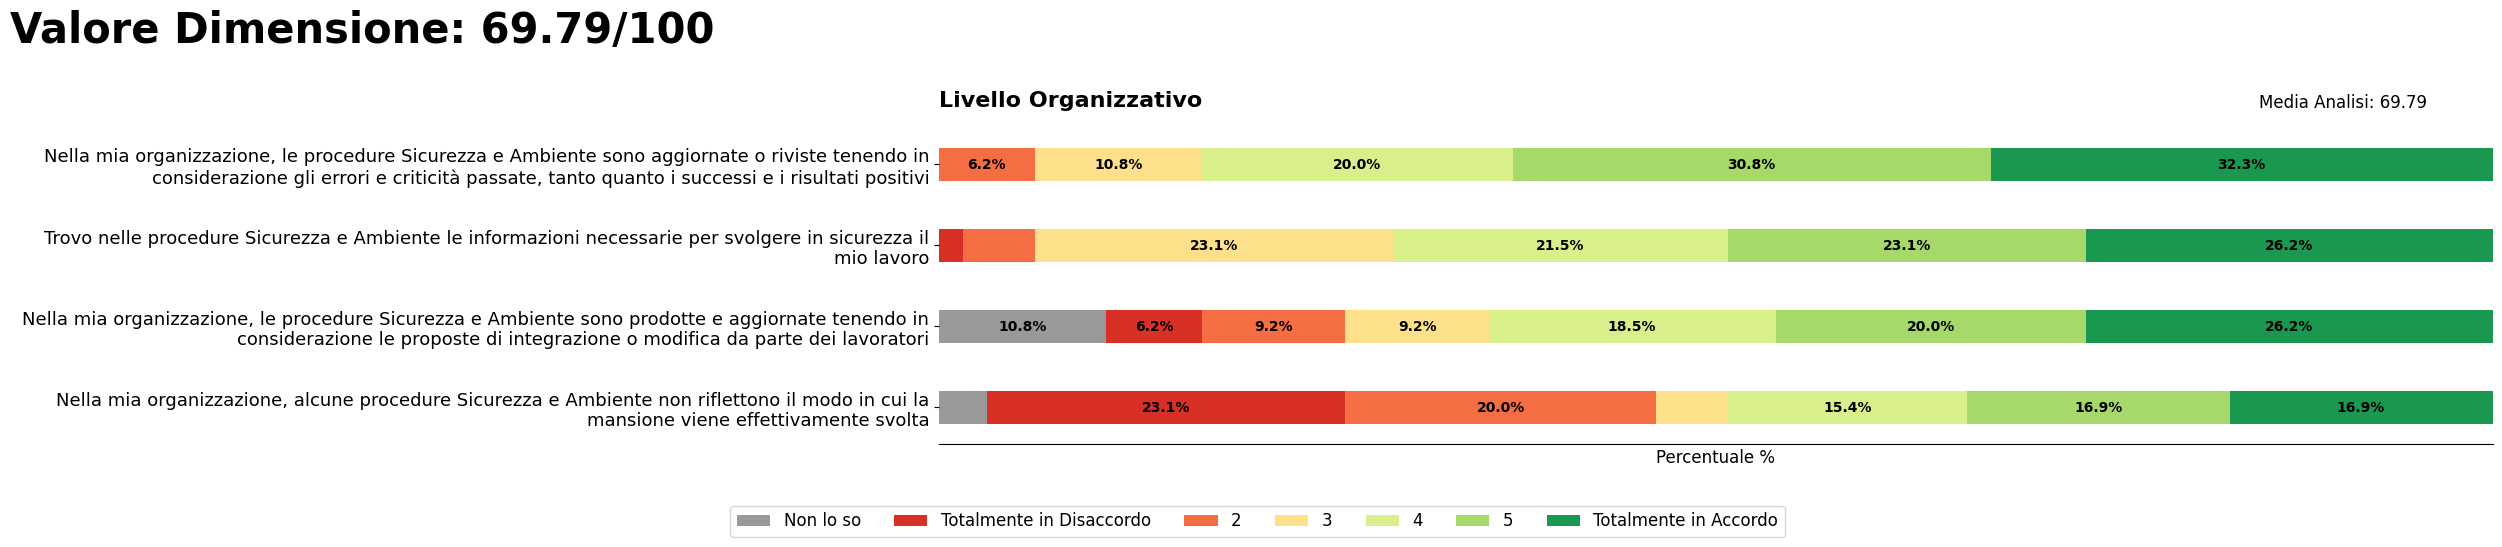

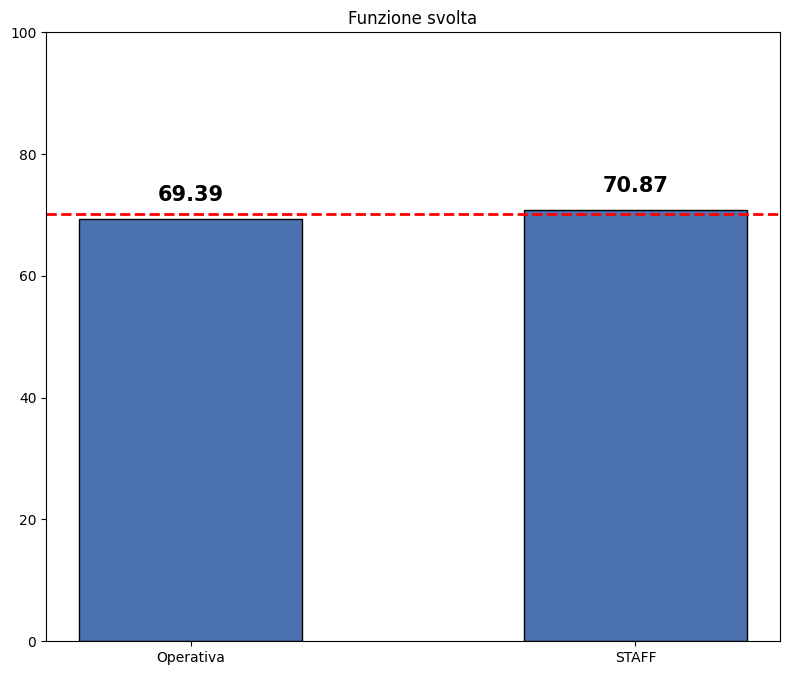

✓ Kiviat inserito in slide 8
✓ Barre raggruppate inserite in slide 9
✓ Stacked tripletta 1 inserito in slide 10
✓ Stratificato tripletta 1 inserito in slide 11
✓ Stacked tripletta 2 inserito in slide 12
✓ Stratificato tripletta 2 inserito in slide 13
✓ Stacked tripletta 3 inserito in slide 14
✓ Stratificato tripletta 3 inserito in slide 15
✓ Stacked tripletta 4 inserito in slide 16
✓ Stratificato tripletta 4 inserito in slide 17
✓ Stacked tripletta 5 inserito in slide 18
✓ Stratificato tripletta 5 inserito in slide 19
✓ Stacked tripletta 6 inserito in slide 20
✓ Stratificato tripletta 6 inserito in slide 21
✓ Stacked tripletta 7 inserito in slide 22
✓ Stratificato tripletta 7 inserito in slide 23
✓ Stacked tripletta 8 inserito in slide 24
✓ Stratificato tripletta 8 inserito in slide 25
✓ Sostituito 'XXX' → 'STOGIT' in slide 1

✅ Presentazione salvata in: LabHSE - STOGIT.pptx
   Slide totali: 27


In [37]:
import io
import os
from pptx import Presentation
from pptx.util import Cm, Pt
from pptx.dml.color import RGBColor
from pptx.enum.text import PP_ALIGN

KIVIAT_CONFIG  = dict(left=Cm(8.92), top=Cm(3.94), width=Cm(16.02), height=Cm(12.64))
BARRE_CONFIG   = dict(left=Cm(1.27), top=Cm(3.25), width=Cm(31.28), height=None)
STACKED_CONFIG = dict(left=Cm(1.13), top=Cm(3.54), width=Cm(31.6), height=None)
STRAT_CONFIG   = dict(left=Cm(9.47), top=Cm(3.74), width=Cm(14.87), height=None)

# ── HELPER FUNCTIONS ─────────────────────────────────────────────────────────
def fig_to_buffer(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=150, bbox_inches='tight')
    buf.seek(0)
    return buf

def aggiungi_titolo_kiviat(slide, media_totale_globale):
    txBox = slide.shapes.add_textbox(Cm(1.4), Cm(2.97), Cm(15.0), Cm(1.5))
    tf = txBox.text_frame
    tf.word_wrap = False
    p = tf.paragraphs[0]
    p.alignment = PP_ALIGN.LEFT
    run = p.add_run()
    run.text = f"La Cultura HSE - valore aggregato: {media_totale_globale}/100"
    run.font.size = Pt(16)
    run.font.bold = True
    run.font.color.rgb = RGBColor(0x1F, 0x1F, 0x1F)
    run.font.name = 'DejaVu Sans'

def sostituisci_nome_in_slide(prs, slide_idx, vecchio_testo, nuovo_testo):
    slide = prs.slides[slide_idx]
    for shape in slide.shapes:
        if shape.has_text_frame:
            for para in shape.text_frame.paragraphs:
                for run in para.runs:
                    if vecchio_testo in run.text:
                        run.text = run.text.replace(vecchio_testo, nuovo_testo)
                        print(f"✓ Sostituito '{vecchio_testo}' → '{nuovo_testo}' in slide {slide_idx + 1}")

def add_image_to_slide(slide, buf, left, top, width, height=None):
    if buf is None:
        return
    buf.seek(0)
    if height:
        slide.shapes.add_picture(buf, left, top, width=width, height=height)
    else:
        slide.shapes.add_picture(buf, left, top, width=width)

def get_or_create_slide(prs, idx):
    while len(prs.slides) <= idx:
        slide_layout = prs.slides[-1].slide_layout
        new_slide = prs.slides.add_slide(slide_layout)
        for shape in list(new_slide.shapes):
            shape._element.getparent().remove(shape._element)
    return prs.slides[idx]

# ── PLOT FUNCTIONS ────────────────────────────────────────────────────────────
def crea_diagramma_kiviat(tutte_le_triplette, labels_categorie, data, media_totale_globale):
    medie_categorie = []
    for sezioni in tutte_le_triplette:
        medie_sezione = []
        for start, end in sezioni:
            df = get_summary_dataset(data.iloc[:, start:end])
            media = df['Media_analisi'].unique()[0]
            medie_sezione.append(media)
        medie_categorie.append(np.mean(medie_sezione))

    num_vars = len(labels_categorie)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    medie_categorie += medie_categorie[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(14, 12), subplot_kw=dict(projection='polar'))
    ax.plot(angles, medie_categorie, 'o-', linewidth=2, color='#4c72b0', label='Media Analisi')
    ax.fill(angles, medie_categorie, alpha=0.25, color='#4c72b0')
    for angle, media in zip(angles[:-1], medie_categorie[:-1]):
        ax.text(angle, media + 0.15, f'{media:.2f}',
                ha='center', va='center', fontsize=18, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.8))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels_categorie, fontsize=18, fontweight='bold')
    ax.tick_params(axis='x', pad=110)
    ax.set_ylim(0, 100)
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    buf = fig_to_buffer(fig)


    plt.show()

    return pd.DataFrame({'Categoria': labels_categorie, 'Media': medie_categorie[:-1]}), buf


def crea_grafico_barre_raggruppate(tutte_le_triplette, titoli_triplette, data, media_totale_globale):
    medie_per_tripletta = []
    for sezioni in tutte_le_triplette:
        medie_sezione = []
        for start, end in sezioni:
            df_temp = get_summary_dataset(data.iloc[:, start:end])
            media = df_temp['Media_analisi'].unique()[0]
            medie_sezione.append(media)
        while len(medie_sezione) < 3:
            medie_sezione.append(np.nan)
        medie_per_tripletta.append(medie_sezione)

    medie_array = np.array(medie_per_tripletta).T
    barWidth = 0.25
    fig, ax = plt.subplots(figsize=(20, 8))
    n_triplette = len(tutte_le_triplette)
    br1 = np.arange(n_triplette)
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    colori_sezioni = ['orange', '#55a868', 'yellow']
    labels_sezioni = titoli_triplette if titoli_triplette else ['Sezione 1', 'Sezione 2', 'Sezione 3']
    bars1 = ax.bar(br1, np.nan_to_num(medie_array[0], nan=0), color=colori_sezioni[0], width=barWidth, edgecolor='grey', label=labels_sezioni[0])
    bars2 = ax.bar(br2, np.nan_to_num(medie_array[1], nan=0), color=colori_sezioni[1], width=barWidth, edgecolor='grey', label=labels_sezioni[1])
    bars3 = ax.bar(br3, np.nan_to_num(medie_array[2], nan=0), color=colori_sezioni[2], width=barWidth, edgecolor='grey', label=labels_sezioni[2])
    for i, bars in enumerate([bars1, bars2, bars3]):
        labels = [f'{v.get_height():.2f}' if not np.isnan(medie_array[i][j]) else '' for j, v in enumerate(bars)]
        ax.bar_label(bars, labels=labels, label_type='edge', color='black', fontsize=12, fontweight='bold')
    ax.set_xticks([r + barWidth for r in range(n_triplette)])
    ax.set_xticklabels(['Comunicazione Interna', 'Coinvolgimento del personale',
                        'Priorità lavorative', 'Risposta Organizzativa',
                        'Impegno aziendale', 'Formazione e competenza',
                        'Percezione Performance', 'Sistema documentale'], fontsize=12)
    ax.axhline(y=media_totale_globale, color='red', linestyle='--', alpha=1, linewidth=4, label='Cultura HSE - valore aggregato')
    ax.legend(fontsize=12, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=True)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--')
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.suptitle(f"La Cultura HSE - valore aggregato: {media_totale_globale}/100",
                 fontsize=24, fontweight='bold', y=0.995, x=0.001, ha='left')
    plt.tight_layout()

    buf = fig_to_buffer(fig)
    plt.show()

    return pd.DataFrame(medie_array.T, columns=labels_sezioni,
                        index=['Comunicazione Interna', 'Coinvolgimento del personale',
                               'Priorità lavorative', 'Risposta Organizzativa',
                               'Impegno aziendale', 'Formazione e competenza',
                               'Percezione Performance', 'Sistema documentale']), buf


def crea_grafico_stacked(sezioni, titoli, data, titolo_figura=""):
    dfs = []
    for start, end in sezioni:
        df = get_summary_dataset(data.iloc[:, start:end]).sort_values(by=6, ascending=False)
        dfs.append(df)
    media_complessiva = pd.concat([df['Media_analisi'] for df in dfs]).unique().mean()
    num_sezioni = len(sezioni)
    if num_sezioni == 1:
        fig, ax = plt.subplots(figsize=(25, 5))
        axes = [ax]
    else:
        fig, axes = plt.subplots(nrows=num_sezioni, ncols=1, figsize=(25, 10), sharex=True)
        if num_sezioni == 1:
            axes = [axes]
    fig.suptitle(f"{titolo_figura}: {media_complessiva.round(2)}/100",
                 fontsize=30, fontweight='bold', y=0.995, x=0.001, ha='left')

    # Mappa completa colori e label per ogni valore possibile
    etichette_legenda_full = {
        0: ('Non lo so',                 '#999999'),
        1: ('Totalmente in Disaccordo',  '#d73027'),
        2: ('2',                         '#f46d43'),
        3: ('3',                         '#fee08b'),
        4: ('4',                         '#d9ef8b'),
        5: ('5',                         '#a6d96a'),
        6: ('Totalmente in Accordo',     '#1a9850')
    }


    valori_presenti   = [0, 1, 2, 3, 4, 5, 6]
    colori_presenti   = [etichette_legenda_full[v][1] for v in valori_presenti]
    etichette_legenda = [etichette_legenda_full[v][0] for v in valori_presenti]

    for i, (df, titolo) in enumerate(zip(dfs, titoli)):
        ax = axes[i]
        df_plot = df.iloc[:, :-2].copy()
        df_plot.columns = [int(c) for c in df_plot.columns]       
        df_plot = df_plot.reindex(columns=[0, 1, 2, 3, 4, 5, 6], fill_value=0) 
        labels_wrapped = [textwrap.fill(label, width=100) for label in df_plot.index]
        df_plot.index = labels_wrapped
        df_plot.plot(kind='barh', stacked=True, color=colori_presenti, ax=ax, legend=False, width=0.4)
        for container in ax.containers:
            labels = [f'{v.get_width():.1f}%' if v.get_width() > 5 else '' for v in container]
            ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=10, fontweight='bold')
        ax.set_title(titolo, fontsize=16, fontweight='bold', loc='left', pad=15)
        ax.text(85, -0.7, f'Media Analisi: {df["Media"].mean():.2f}', fontsize=12)
        ax.tick_params(axis='y', labelsize=13)
        ax.tick_params(axis='x', labelsize=11)
        ax.invert_yaxis()
        ax.set_xlim(0, 100)
        ax.set_xlabel("Percentuale %", fontsize=12)
        ax.grid(axis='x', linestyle='--', alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.set_xticks([])

    fig.legend(labels=etichette_legenda, loc='upper center',
               bbox_to_anchor=(0.5, 0.02), ncol=7, frameon=True, fontsize=12)
    plt.tight_layout(rect=[0, 0.05, 1, 0.98])

    buf = fig_to_buffer(fig)
    plt.show()

    return pd.concat(dfs), buf

def crea_grafico_stratificato(sezioni, stratificazioni, data, titolo_figura=""):
    risultati = {}
    for nome, config in stratificazioni.items():
        reports = []
        for start, end in sezioni:
            report = get_stratified_means_full_benchmarks(
                data, data.iloc[:, start:end].columns, config['col'])
            reports.append(report)
        risultati[nome] = pd.concat(reports)

    if not any(len(risultati[nome]) > 0 for nome in risultati):
        print(f"Avviso: Nessun dato disponibile per {titolo_figura}")
        return risultati, None

    fig, ax = plt.subplots(figsize=(8, 7))
    fig.suptitle(titolo_figura, fontsize=16, fontweight='bold')
    for nome, config in stratificazioni.items():
        medie = risultati[nome].iloc[:, :2].mean() if risultati[nome].shape[1] >= 2 else risultati[nome].mean()
        ax.bar(config['ticks'][:len(medie)], medie, width=0.5, color='#4c72b0', edgecolor='black')
        ax.set_title(config['title'])
        ax.bar_label(ax.containers[0],
                     labels=[f'{v.get_height():.2f}' for v in ax.containers[0]],
                     color='black', fontsize=15, fontweight='bold', padding=10)
        ax.axhline(y=medie.mean(), color='red', linestyle='--', alpha=1, linewidth=2, label='Media')
        ax.set_ylim(0, 100)
    plt.tight_layout()

    buf = fig_to_buffer(fig)
    plt.show()

    return risultati, buf


def inserisci_tutti_i_grafici_in_pptx(pptx_path, output_path,
                                       buf_kiviat, buf_barre,
                                       buffers_loop, name, media_totale_globale):
    prs = Presentation(pptx_path)

    # --- Slide 8 (idx 7): Kiviat ---
    slide = get_or_create_slide(prs, 7)
    add_image_to_slide(slide, buf_kiviat, **KIVIAT_CONFIG)
    aggiungi_titolo_kiviat(slide, media_totale_globale)
    print("✓ Kiviat inserito in slide 8")

    # --- Slide 9 (idx 8): Barre raggruppate ---
    slide = get_or_create_slide(prs, 8)
    add_image_to_slide(slide, buf_barre, **BARRE_CONFIG)
    print("✓ Barre raggruppate inserite in slide 9")

    # --- Slides 10+: stacked + stratificato per ogni tripletta ---
    slide_idx = 9
    for i, (buf_stacked, buf_strat) in enumerate(buffers_loop):
        slide = get_or_create_slide(prs, slide_idx)
        add_image_to_slide(slide, buf_stacked, **STACKED_CONFIG)
        print(f"✓ Stacked tripletta {i+1} inserito in slide {slide_idx + 1}")
        slide_idx += 1

        if buf_strat is not None:
            slide = get_or_create_slide(prs, slide_idx)
            add_image_to_slide(slide, buf_strat, **STRAT_CONFIG)
            print(f"✓ Stratificato tripletta {i+1} inserito in slide {slide_idx + 1}")
            slide_idx += 1

    # --- Sostituisci nome azienda in slide 1 ---
    sostituisci_nome_in_slide(prs, slide_idx=0, vecchio_testo='XXX', nuovo_testo=name)

    prs.save(output_path)
    print(f"\n✅ Presentazione salvata in: {output_path}")
    print(f"   Slide totali: {len(prs.slides)}")


# ── 0. Calcola media totale globale (mean of means) ──────────────────────────
medie_per_categoria = []
for sezioni in tutte_le_triplette:
    medie_sezione = []
    for start, end in sezioni:
        df_temp = get_summary_dataset(data.iloc[:, start:end])
        medie_sezione.append(df_temp['Media_analisi'].unique()[0])
    medie_per_categoria.append(np.mean(medie_sezione))

media_totale_globale = round(np.mean(medie_per_categoria), 2)
print(f"Media totale globale: {media_totale_globale}/100")

# ── 1. Kiviat ────────────────────────────────────────────────────────────────
labels_categorie = [
    'Comunicazione Interna', 'Coinvolgimento del personale',
    'Priorità lavorative', 'Risposta Organizzativa',
    'Impegno aziendale', 'Formazione e competenza',
    'Percezione Performance', 'Sistema documentale'
]
df_kiviat, buf_kiviat = crea_diagramma_kiviat(tutte_le_triplette, labels_categorie, data, media_totale_globale)

# ── 2. Barre raggruppate ─────────────────────────────────────────────────────
df_barre, buf_barre = crea_grafico_barre_raggruppate(tutte_le_triplette, titoli_triplette, data, media_totale_globale)

# ── 3. Loop triplette (stacked + stratificato) ───────────────────────────────
buffers_loop = []
for idx, sezioni in enumerate(tutte_le_triplette, 1):
    print(f"=== SET {idx}: Sezioni {sezioni} ===")

    _, buf_stacked = crea_grafico_stacked(
        sezioni,
        ["Livello Organizzativo", "Livello Supervisor", "Livello Coworker"],
        data,
        titolo_figura='Valore Dimensione'
    )

    _, buf_strat = crea_grafico_stratificato(
        sezioni, stratificazioni, data
    )

    buffers_loop.append((buf_stacked, buf_strat))

# ── 4. Inserisci tutto nel PPTX ──────────────────────────────────────────────
inserisci_tutti_i_grafici_in_pptx(
    pptx_path='LabHSE vuota.pptx',
    output_path=f'LabHSE - {name}.pptx',
    buf_kiviat=buf_kiviat,
    buf_barre=buf_barre,
    buffers_loop=buffers_loop,
    name=name,
    media_totale_globale=media_totale_globale
)